In [1]:
import pandas as pd
from itertools import zip_longest
from IPython.display import HTML as html_print
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import re

In [2]:
test = pd.read_csv('/home/martinha/PycharmProjects/protein/viral_fp/viral_fp_new/datasets/test.csv')
test = test.sort_values(by=['idProtein'])
test.at[9,'seq_vfp'] = ''
test

idProtein                                            Name Class  \
2        105                           Envelope glycoprotein     I   
6        146                              Genome polyprotein    II   
5        158                              Genome polyprotein    II   
0        192                            Spike glycoprotein S     I   
7        225  Envelope glycoprotein gp160 (Env polyprotein)      I   
1        265  Envelope glycoprotein gp160 (Env polyprotein)      I   
4        574         Pre-glycoprotein polyprotein GP complex     I   
3        618                          fusion glycoprotein F0     I   
8        779                                  G glycoprotein   III   
9        804                              Spike glycoprotein     I   

                  Activation       Name_Fusogenic_Unit Location_Fusogenic  \
2        binding to receptor     Envelope protein p15E            466-644   
6                        NaN  Envelope glycoprotein E1            192-384   
5                        NaN  Envelope glycoprotein E1            192-383   
0  interacting with receptor                 Corona S2           759-1353   
7        binding to receptor      gp41 - by similarity            499-843   
1        binding to receptor      gp41 - by similarity            488-832   
4                     low pH                       GP2            266-498   
3        binding to receptor                        F1            102-537   
8                     low pH                        H2                NaN   
9        binding to receptor                        S2           686-1273   

                                  Sequence_fusogenic UniProtID  NcbiID  \
2  DPISLTVALMLGGITVGGMARNRNRDCGLLETAQFRQLQMAMHTDI...    P21443     NaN   
6  LEYRNASGLYLLTNDCSNRSIVYEADDVILHLPGCVPCVETDNNNT...    Q81487     NaN   
5  LEYRNASGLYTVTNDCSNGSIVYEAGDVILHLPGCIPCVRLNNASK...    Q68801     NaN   
0  AITTGYRFTNFEPFTVNSVNDSLEPVGGLYEIQIPSEFTIGNMVEF...    P36334     NaN   
7  AVGMGAVLFGFLGAAGSTMGAAAITLTAQARQLLSGIVQQQSNLLK...    Q9QBZ4     NaN   
1  AAGLGALFLGFLGDSREHMGAASITLTVQARQLLSGIVQQQNNLLR...    Q9QSQ7     NaN   
4  GTFTWTLSDSSGVENPGGYCLTKWMILAAELKCFGNTAVAKCNVNH...    P07399     NaN   
3  FLGLILGLGAAVTAGVALAKTVQLESEIALIRDAVRNTNEAVVSLT...    P35949     NaN   
8  MKCLLYLAFLSIGVNCKFTIVFPHNQKGTWKNVPSNYHYCPSSSDL...       NaN     NaN   
9  SVASQSIIAYTMSLGAENSVAYSNNSIAIPTNFTISVTTEILPVSM...    P0DTC2     NaN   

   idTaxonomy  ...  idTaxonomy.1                                CommonName  \
2         105  ...           105     Feline leukemia virus (isolate CFE-6)   
6         146  ...           146                         Hepatitis C virus   
5         158  ...           158                         Hepatitis C virus   
0         192  ...           192                         Human Coronavirus   
7         225  ...           225              Human immunodeficiency virus   
1         265  ...           265              Human immunodeficiency virus   
4         574  ...           574        Lymphocytic choriomeningitis virus   
3         618  ...           618  Murine pneumonia virus (strain 15) (MPV)   
8         774  ...           774                Vesicular stomatitis virus   
9         804  ...           804                                SARS-CoV-2   

           Family             Genre  \
2   Retroviridae    Gammaretrovirus   
6    Flaviviridae       Hepacivirus   
5    Flaviviridae       Hepacivirus   
0   Coronaviridae   Betacoronavirus   
7    Retroviridae        Lentivirus   
1    Retroviridae        Lentivirus   
4    Arenaviridae    Mammarenavirus   
3  Pneumoviridae   Orthopneumovirus   
8   Rhabdoviridae     Vesiculovirus   
9   Coronaviridae   Betacoronavirus   

                                       Species  \
2                        Feline leukemia virus   
6                                Hepacivirus C   
5                                Hepacivirus C   
0                            Betacoronavirus 1   
7               Human immunode

In [3]:
# run https://dtu.biolib.com/DeepTMHMM on 2022/12/29
tmd = {'192':'OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOMMMMMMMMMMMMMMMMMMMMMIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII',
       '265': 'OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOMMMMMMMMMMMMMMMMMMMMMIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII',
       '105':'SSSSSSSSSSOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOMMMMMMMMMMIIIIIIIIIIIIIIIIIIIIII',
       '618':'OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOMMMMMMMMMMMMMMMMMMMIIIIIIIIIIIIIIIIIIIIIII',
       '574':'OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOMMMMMMMMMMIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII',
       '158':'OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOMMMMMMMMMMMMMMMMMIMMMMMMMMMMOOOOOOOOOOOOOOOOOOOOOOOOOOOMMMMMMMMMMMMMMMMIIIIIIIIIMMMMMMMMMMMMMMMMMMMMMOOOOMMMMMMMMMMMMMMI',
      '146':'OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOMMMMMMMMMMMMMIIIIIIIIMMMMMMMMMMMMMMMMMMMMMOOOOMMMMMMMMMMMMMMMI',
       '225':'SSSSSSSSSSOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOMMMMMMMMMMIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII',
      '779':'SSSSSSSSSSSSSSSSOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOMMMMMMMMMMMMMMMMMMMMMIIIIIIIIIIIIIIIIIIIIIII',
      '804':'OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOMMMMMMMMMMMMMMMMMMMMMIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII'
      }

In [15]:
   
# get html element
def cstr(s, bold, color='black'):
    if s == ' ':
        return "<text style=color:#000;padding-left:10px;background-color:{}> </text>".format(color, s)
    else:
        if bold == 'b':
            return "<text style=color:#000;background-color:{}> <b><u>{}</u></b> </text>".format(color, s)
#         if tmd == 't':
#             return "<text style=color:#000;background-color:{}> <b><u>{}</u></b> </text>".format(color, s)
        else:
            return "<text style=color:#000;background-color:{}>{} </text>".format(color, s)

    #             return "<text style=color:#000;padding-left:10px;background-color:{}> <{}> </text> </{}>".format(bold,color,s,bold)
#             return "<text style=color:#000;background-color:{}>{} <{}> </text> </{}>".format(color,s,bold,bold) 

# print html
def print_color(t, bold_letter):
#     for i in range(len(t)):
#         ti = t[i][0]
#         ci = t[i][1]
#         bi = bold_letter[i][1]
    display(html_print(''.join([cstr(t[i][0],bold_letter[i][1], color=t[i][1]) for i in range(len(t))])))
#     display(html_print(''.join([cstr(ti, color=ci, bi) for ti,ci in t])))
#     display(html_print(''.join([bold(ti, bi) for ti,bi in bold_letter])))

# get appropriate color for value
def get_clr(value):
    cmap = cm.get_cmap('YlOrRd')  
    rgba = cmap(value)
    # rgb2hex accepts rgb or rgba
    col = matplotlib.colors.rgb2hex(rgba)
    return col
    
#check if this is ok
def get_scores_seq(seq,file_predict):

#           entity     score  index word start   end  class predicted  prob_class_0  prob_class_1
# 0    LABEL_0  0.986431      1    S  None  None                0      0.986431      0.013569
# 1    LABEL_0  0.997625      2    V  None  None                0      0.997625      0.002375
# 2    LABEL_0  0.996090      3    A  None  None                0      0.996090      0.003910
    list_scores=file_predict['prob_class_1']
#         list_scores.append(round(float(new_val),4))
    return list_scores

def graphic(new_score):
    plt.plot(new_score)
    plt.show()
    

def visualize(file_predict, seq, location): 
    new_score = get_scores_seq(seq,file_predict)

    # graphic(new_score)
    text_colours = []
    bold_letter = []
    for i in range(len(seq)-2):
        text = (seq[i], get_clr(new_score[i]))
        text_colours.append(text)
        
        if type(location) == list: 
            # '[(85, 93), (129, 136)]'' : # bipartid
            if i in range(location[0][0], location[0][1]-1):
              bold_letter.append((seq[i],'b'))
            elif i in range(location[1][0], location[1][1]-1):
              bold_letter.append((seq[i],'b'))      
            else:
              bold_letter.append((seq[i],np.nan))
                    
        else: # all the others peptides
            if i in range(location[0], location[1]-1):
                bold_letter.append((seq[i],'b'))
            else:
                bold_letter.append((seq[i],np.nan))
    
    # location in bold or box around 
    print_color(text_colours, bold_letter)

# def visualize_tmd(tmd_str, sequence_fusogenic):
#     score_list = []
#     bold_letter = []
#     text_colours = []
#     tmd = []
#     signal= []
#     for i in range(len(tmd_str)):   #'OSMI'
#         ch = tmd_str[i]
#         aa = sequence_fusogenic[i]


#         if ch == 'M':
#             membrane = 0.9
#             tmd.append(aa)
#         elif ch == 'S':
#             # its a signal !!!!! just to not change the color 
#             membrane = 0.5 # just a number to get colour
#             signal.append(aa)
#         else:
#             membrane = 0

#         text = (aa, get_clr(membrane))
#         text_colours.append(text)
#         bold_letter.append('none')
#         score_list.append(membrane)
        
#     print_color(text_colours, bold_letter)
#     print('tmd', str(tmd))
#     print('signal', str(signal))
        

In [8]:

# path_results ='/home/martinha/PycharmProjects/protein/viral_fp/viral_fp_new/src/classify_full_seq/results/dl/'

# def output(model_name_specific):
#     for idProtein in test['idProtein']: 
#         print('################################')
#         print(idProtein)

#         file_predict = pd.read_csv(path_results+model_name_specific + '/TESTSEQ{}.csv'.format(idProtein))

#         test_id = test.loc[test['idProtein'] == idProtein]

#         true_subseq = str(test_id['seq_vfp'].values[0])
#         fusogenic = str(test_id['Sequence_fusogenic'].values[0])

#         print(test_id['Name'].values[0])

#         tmd_predict = tmd[str(idProtein)]    

#         # index of true vfp
#         print(true_subseq)
#         if idProtein == 779: # éo bipartido
#             true_subseq1 = 'FRWYGPKY'
#             true_subseq2 = 'CGYATVT'
#             index_of_vfp1 =  fusogenic.index(true_subseq1)
#             index_of_vfp2 =  fusogenic.index(true_subseq2)
#             location_of_vfp1 = (index_of_vfp1, index_of_vfp1 + len(true_subseq1))
#             location_of_vfp2 = (index_of_vfp2, index_of_vfp2 + len(true_subseq2))
#             location_of_vfp = [location_of_vfp1, location_of_vfp2]

#         else:
        
#             index_of_vfp =  fusogenic.index(true_subseq)
#             location_of_vfp = (index_of_vfp, index_of_vfp + len(true_subseq)+1)
        
        
#         print('vfp model prediction')
#         # plot the vfp model predictions  

#         visualize(file_predict, seq = fusogenic, location = location_of_vfp)

#         print('tmd prediction by DeepTMHMM')
#         visualize_tmd(tmd_predict,fusogenic)


#         # ### relevant info 
#         score_of_true_vfp = file_predict.loc[index_of_vfp]['class predicted']
#         print('vfp predicted:', score_of_true_vfp )
#         if len(file_predict.columns)>2 : # tem proba
#             score_of_true_vfp_0 = file_predict.loc[index_of_vfp]['prob_class_0']
#             score_of_true_vfp_1 = file_predict.loc[index_of_vfp]['prob_class_1']
#             print('score vfp predicted:', score_of_true_vfp_1)
#             df_sorted = file_predict.sort_values(by='prob_class_1', ascending=False)
#             print('\n max score predicted')
#             print('\n top scores')
#             print(df_sorted[:5])

#         print('index of true', index_of_vfp)
#     #     print(file_predict.loc[file_predict['class predicted']==1])




In [11]:
path_results ='/home/martinha/PycharmProjects/protein/viral_fp/viral_fp_new/src/classify_full_seq/results/dl/'

def output_simple(model_name_specific):
    for idProtein in test['idProtein']: 
        print('################################')
        print(idProtein)

        file_predict = pd.read_csv(path_results+model_name_specific + '/TESTSEQ{}.csv'.format(idProtein))

        test_id = test.loc[test['idProtein'] == idProtein]

        true_subseq = str(test_id['seq_vfp'].values[0])
        fusogenic = str(test_id['Sequence_fusogenic'].values[0])

        print(test_id['Name'].values[0])

        # index of true vfp
        print(true_subseq)
        if idProtein == 779: # éo bipartido
            true_subseq1 = 'FRWYGPKY'
            true_subseq2 = 'CGYATVT'
            index_of_vfp1 =  fusogenic.index(true_subseq1)
            index_of_vfp2 =  fusogenic.index(true_subseq2)
            location_of_vfp1 = (index_of_vfp1, index_of_vfp1 + len(true_subseq1))
            location_of_vfp2 = (index_of_vfp2, index_of_vfp2 + len(true_subseq2))
            location_of_vfp = [location_of_vfp1, location_of_vfp2]

        else:
        
            index_of_vfp =  fusogenic.index(true_subseq)
            location_of_vfp = (index_of_vfp, index_of_vfp + len(true_subseq)+1)
        
        
        print('vfp model prediction')
        # plot the vfp model predictions  

        visualize(file_predict, seq = fusogenic, location = location_of_vfp)
        
        # ### relevant info 
        score_of_true_vfp = file_predict.loc[index_of_vfp]['class predicted']
        print('vfp predicted:', score_of_true_vfp )



In [16]:
# T6 ESM2b
model_name_specific = '/seq_transformers_token_10KFOLD_cluster80_bilstm'    # epochs 3 model small 1500 seqs inicio
# predicts 6 right 

output_simple(model_name_specific)



################################
105
Envelope glycoprotein
PISLTVALMLGGITVGGMARN
vfp model prediction


/tmp/ipykernel_948553/59156964.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('YlOrRd')


vfp predicted: 1
################################
146
Genome polyprotein
LVAPPTLCSALYVEDAFGAVSLVGQAFTFRPR
vfp model prediction


/tmp/ipykernel_948553/59156964.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('YlOrRd')


vfp predicted: 0
################################
158
Genome polyprotein
MVGAATLCSALYVGDLCGALFLVGQGFSWRHR
vfp model prediction


/tmp/ipykernel_948553/59156964.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('YlOrRd')


vfp predicted: 1
################################
192
Spike glycoprotein S
LAATSASLFPPWTAAAGVPFY
vfp model prediction


/tmp/ipykernel_948553/59156964.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('YlOrRd')


vfp predicted: 0
################################
225
Envelope glycoprotein gp160 (Env polyprotein) 
AVGMGAVLFGFLGAAGSTMGA
vfp model prediction


/tmp/ipykernel_948553/59156964.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('YlOrRd')


vfp predicted: 1
################################
265
Envelope glycoprotein gp160 (Env polyprotein) 
AAGLGALFLGFLGDSREHMGA
vfp model prediction


/tmp/ipykernel_948553/59156964.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('YlOrRd')


vfp predicted: 1
################################
574
Pre-glycoprotein polyprotein GP complex
GTFTWTLSDSSGVENPGGYCLTKWMILAAELKCFGNTAV
vfp model prediction


/tmp/ipykernel_948553/59156964.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('YlOrRd')


vfp predicted: 0
################################
618
fusion glycoprotein F0
FLGLILGLGAAVTAGVALAKT
vfp model prediction


/tmp/ipykernel_948553/59156964.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('YlOrRd')


vfp predicted: 1
################################
779
G glycoprotein
[FRWYGPKY CGYATVT]
vfp model prediction


/tmp/ipykernel_948553/59156964.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('YlOrRd')


vfp predicted: 0
################################
804
Spike glycoprotein

vfp model prediction


/tmp/ipykernel_948553/59156964.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('YlOrRd')


vfp predicted: 0


################################
105
Envelope glycoprotein
PISLTVALMLGGITVGGMARN
vfp model prediction


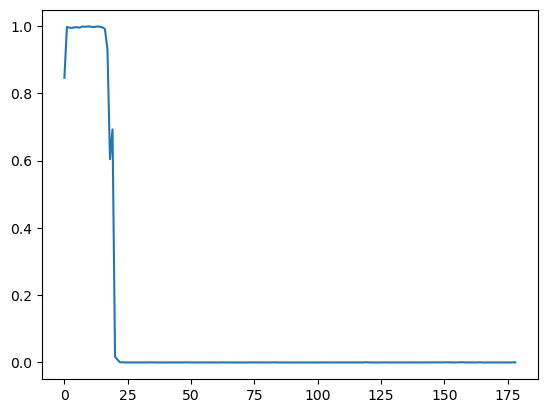

tmd prediction by DeepTMHMM


tmd ['L', 'M', 'I', 'L', 'L', 'L', 'I', 'L', 'L', 'F']
signal ['D', 'P', 'I', 'S', 'L', 'T', 'V', 'A', 'L', 'M']
vfp predicted: 1
score vfp predicted: 0.9974639415740968

 max score predicted

 top scores
    Unnamed: 0   entity     score  index word  start  end  class predicted  \
13          13  LABEL_1  0.998938     14    I    NaN  NaN                1   
10          10  LABEL_1  0.998852     11    L    NaN  NaN                1   
9            9  LABEL_1  0.998797     10    M    NaN  NaN                1   
7            7  LABEL_1  0.998689      8    A    NaN  NaN                1   
14          14  LABEL_1  0.998524     15    T    NaN  NaN                1   

    prob_class_0  prob_class_1  
13      0.001062      0.998938  
10      0.001148      0.998852  
9       0.001203      0.998797  
7       0.001311      0.998689  
14      0.001476      0.998524  
index of true 1
################################
146
Genome polyprotein
LVAPPTLCSALYVEDAFGAVSLVGQAFTFRPR
vfp model prediction


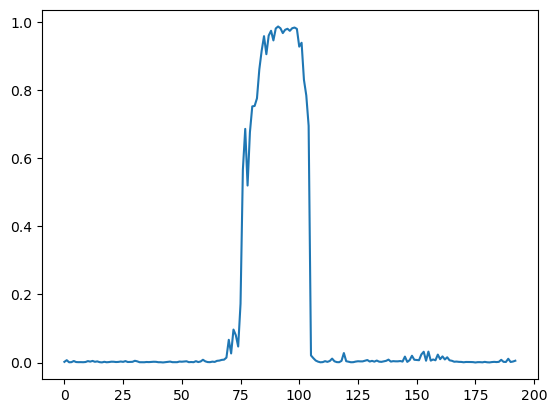

tmd prediction by DeepTMHMM


tmd ['M', 'M', 'M', 'N', 'W', 'S', 'P', 'A', 'I', 'G', 'L', 'V', 'I', 'T', 'F', 'F', 'D', 'L', 'V', 'V', 'G', 'A', 'H', 'W', 'G', 'V', 'M', 'A', 'G', 'L', 'A', 'Y', 'F', 'S', 'W', 'A', 'K', 'V', 'V', 'I', 'V', 'L', 'I', 'M', 'F', 'S', 'G', 'V', 'D']
signal []
vfp predicted: 0
score vfp predicted: 0.0472108721733093

 max score predicted

 top scores
    Unnamed: 0   entity     score  index word  start  end  class predicted  \
91          91  LABEL_1  0.986861     92    G    NaN  NaN                1   
98          98  LABEL_1  0.983767     99    Q    NaN  NaN                1   
97          97  LABEL_1  0.981737     98    G    NaN  NaN                1   
92          92  LABEL_1  0.981590     93    A    NaN  NaN                1   
90          90  LABEL_1  0.980964     91    F    NaN  NaN                1   

    prob_class_0  prob_class_1  
91      0.013139      0.986861  
98      0.016233      0.983767  
97      0.018263      0.981737  
92      0.018410      0.981590  
90      0.0190

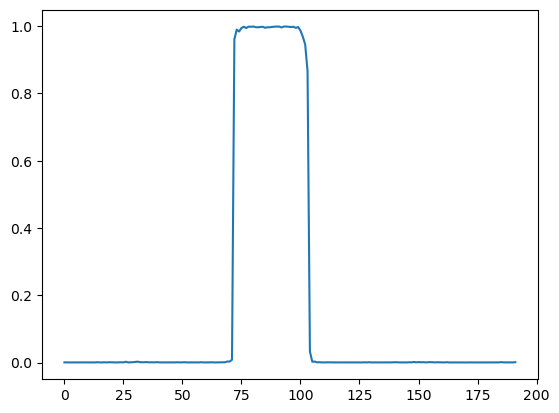

tmd prediction by DeepTMHMM


tmd ['M', 'M', 'V', 'G', 'A', 'A', 'T', 'L', 'C', 'S', 'A', 'L', 'Y', 'V', 'G', 'D', 'L', 'G', 'A', 'L', 'F', 'L', 'V', 'G', 'Q', 'G', 'F', 'A', 'W', 'D', 'M', 'M', 'M', 'N', 'W', 'S', 'P', 'A', 'M', 'T', 'L', 'I', 'V', 'M', 'F', 'D', 'L', 'V', 'I', 'G', 'A', 'H', 'W', 'G', 'V', 'M', 'A', 'G', 'V', 'A', 'Y', 'Y', 'S', 'M', 'A', 'K', 'V', 'F', 'L', 'V', 'L', 'C', 'L', 'F', 'S', 'G', 'V', 'D']
signal []
vfp predicted: 1
score vfp predicted: 0.9899618625640868

 max score predicted

 top scores
    Unnamed: 0   entity     score  index word  start  end  class predicted  \
80          80  LABEL_1  0.999186     81    C    NaN  NaN                1   
93          93  LABEL_1  0.999141     94    F    NaN  NaN                1   
94          94  LABEL_1  0.999038     95    L    NaN  NaN                1   
90          90  LABEL_1  0.998968     91    G    NaN  NaN                1   
91          91  LABEL_1  0.998828     92    A    NaN  NaN                1   

    prob_class_0  prob_class_1  
8

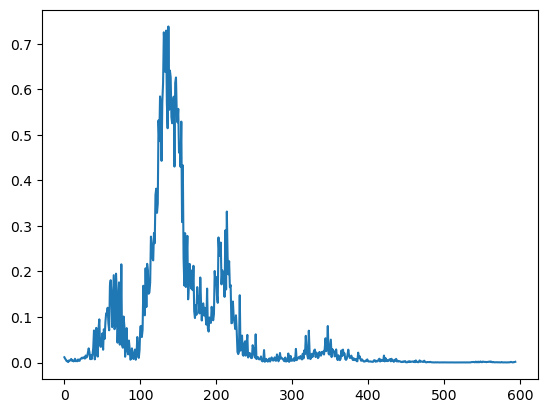

tmd prediction by DeepTMHMM


tmd ['W', 'Y', 'V', 'W', 'L', 'L', 'I', 'C', 'L', 'A', 'G', 'V', 'A', 'M', 'L', 'V', 'L', 'L', 'F', 'F', 'I']
signal []
vfp predicted: 0
score vfp predicted: 0.2391472458839416

 max score predicted

 top scores
     Unnamed: 0   entity     score  index word  start  end  class predicted  \
137         137  LABEL_1  0.738101    138    E    NaN  NaN                1   
134         134  LABEL_1  0.729058    135    L    NaN  NaN                1   
131         131  LABEL_1  0.725229    132    L    NaN  NaN                1   
132         132  LABEL_1  0.692036    133    G    NaN  NaN                1   
139         139  LABEL_1  0.641367    140    S    NaN  NaN                1   

     prob_class_0  prob_class_1  
137      0.261899      0.738101  
134      0.270942      0.729058  
131      0.274771      0.725229  
132      0.307964      0.692036  
139      0.358633      0.641367  
index of true 204
################################
225
Envelope glycoprotein gp160 (Env polyprotein) 
AVGMGAV

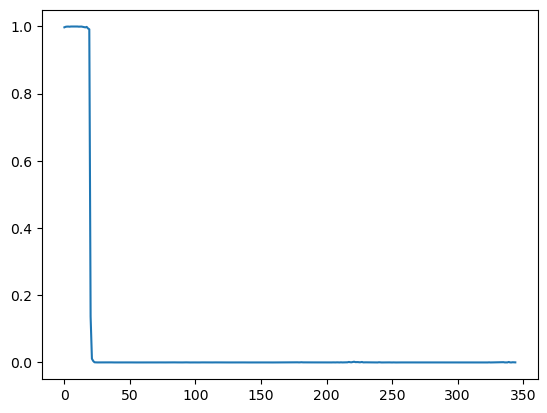

tmd prediction by DeepTMHMM


tmd ['I', 'F', 'I', 'M', 'I', 'V', 'G', 'G', 'L', 'I']
signal ['A', 'V', 'G', 'M', 'G', 'A', 'V', 'L', 'F', 'G']
vfp predicted: 1
score vfp predicted: 0.9971901774406432

 max score predicted

 top scores
    Unnamed: 0   entity     score  index word  start  end  class predicted  \
8            8  LABEL_1  0.999665      9    F    NaN  NaN                1   
7            7  LABEL_1  0.999589      8    L    NaN  NaN                1   
5            5  LABEL_1  0.999557      6    A    NaN  NaN                1   
10          10  LABEL_1  0.999552     11    F    NaN  NaN                1   
6            6  LABEL_1  0.999547      7    V    NaN  NaN                1   

    prob_class_0  prob_class_1  
8       0.000335      0.999665  
7       0.000411      0.999589  
5       0.000443      0.999557  
10      0.000448      0.999552  
6       0.000453      0.999547  
index of true 0
################################
265
Envelope glycoprotein gp160 (Env polyprotein) 
AAGLGALFLGFLGDSREHMGA
vfp mo

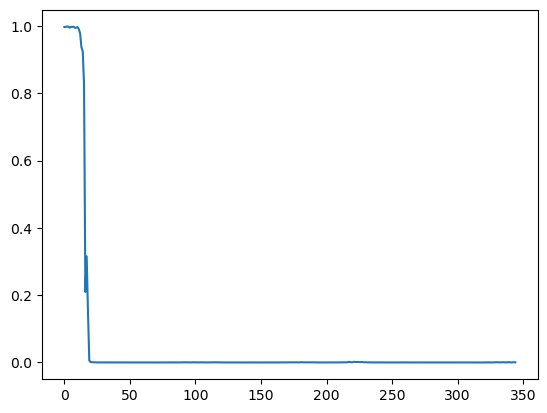

tmd prediction by DeepTMHMM


tmd ['I', 'K', 'I', 'F', 'I', 'M', 'I', 'V', 'G', 'G', 'L', 'I', 'G', 'L', 'R', 'I', 'V', 'F', 'A', 'V', 'L']
signal []
vfp predicted: 1
score vfp predicted: 0.996871054172516

 max score predicted

 top scores
   Unnamed: 0   entity     score  index word  start  end  class predicted  \
2           2  LABEL_1  0.998348      3    G    NaN  NaN                1   
3           3  LABEL_1  0.997874      4    L    NaN  NaN                1   
7           7  LABEL_1  0.997688      8    F    NaN  NaN                1   
1           1  LABEL_1  0.997224      2    A    NaN  NaN                1   
6           6  LABEL_1  0.996975      7    L    NaN  NaN                1   

   prob_class_0  prob_class_1  
2      0.001652      0.998348  
3      0.002126      0.997874  
7      0.002312      0.997688  
1      0.002776      0.997224  
6      0.003025      0.996975  
index of true 0
################################
574
Pre-glycoprotein polyprotein GP complex
GTFTWTLSDSSGVENPGGYCLTKWMILAAELKCFGNTAV
v

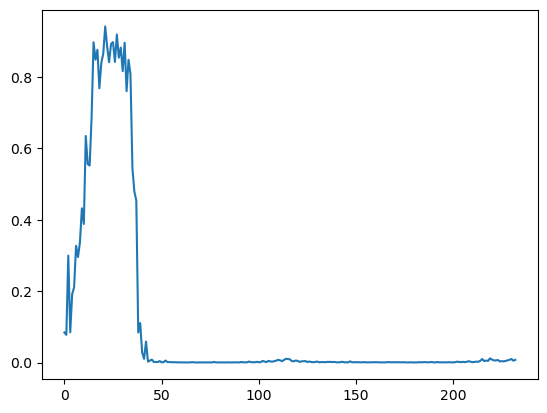

tmd prediction by DeepTMHMM


tmd ['L', 'M', 'D', 'L', 'L', 'M', 'F', 'S', 'T', 'S']
signal []
vfp predicted: 0
score vfp predicted: 0.0842118859291076

 max score predicted

 top scores
    Unnamed: 0   entity     score  index word  start  end  class predicted  \
21          21  LABEL_1  0.941895     22    T    NaN  NaN                1   
27          27  LABEL_1  0.919493     28    A    NaN  NaN                1   
25          25  LABEL_1  0.898079     26    I    NaN  NaN                1   
15          15  LABEL_1  0.897535     16    P    NaN  NaN                1   
31          31  LABEL_1  0.896403     32    K    NaN  NaN                1   

    prob_class_0  prob_class_1  
21      0.058105      0.941895  
27      0.080507      0.919493  
25      0.101921      0.898079  
15      0.102466      0.897534  
31      0.103597      0.896403  
index of true 0
################################
618
fusion glycoprotein F0
FLGLILGLGAAVTAGVALAKT
vfp model prediction


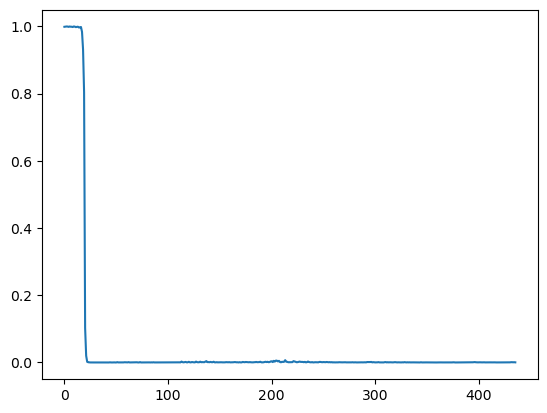

tmd prediction by DeepTMHMM


tmd ['L', 'L', 'F', 'V', 'V', 'M', 'L', 'I', 'I', 'I', 'M', 'A', 'V', 'I', 'G', 'F', 'I', 'L', 'Y']
signal []
vfp predicted: 1
score vfp predicted: 0.998546540737152

 max score predicted

 top scores
    Unnamed: 0   entity     score  index word  start  end  class predicted  \
9            9  LABEL_1  0.999498     10    A    NaN  NaN                1   
2            2  LABEL_1  0.999449      3    G    NaN  NaN                1   
5            5  LABEL_1  0.999408      6    L    NaN  NaN                1   
3            3  LABEL_1  0.999329      4    L    NaN  NaN                1   
10          10  LABEL_1  0.999088     11    A    NaN  NaN                1   

    prob_class_0  prob_class_1  
9       0.000502      0.999498  
2       0.000551      0.999449  
5       0.000592      0.999408  
3       0.000671      0.999329  
10      0.000912      0.999088  
index of true 0
################################
779
G glycoprotein
[FRWYGPKY CGYATVT]
vfp model prediction


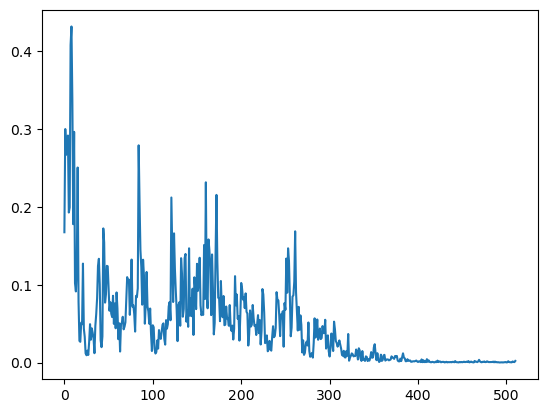

tmd prediction by DeepTMHMM


tmd ['F', 'F', 'F', 'I', 'I', 'G', 'L', 'I', 'I', 'G', 'L', 'F', 'L', 'V', 'L', 'R', 'V', 'G', 'I', 'Y', 'L']
signal ['M', 'K', 'C', 'L', 'L', 'Y', 'L', 'A', 'F', 'L', 'S', 'I', 'G', 'V', 'N', 'C']
vfp predicted: 0
score vfp predicted: 0.1674106121063232

 max score predicted

 top scores
    Unnamed: 0   entity     score  index word  start  end  class predicted  \
8            8  LABEL_0  0.568374      9    F    NaN  NaN                0   
7            7  LABEL_0  0.592200      8    A    NaN  NaN                0   
9            9  LABEL_0  0.662130     10    L    NaN  NaN                0   
1            1  LABEL_0  0.700061      2    K    NaN  NaN                0   
11          11  LABEL_0  0.703714     12    I    NaN  NaN                0   

    prob_class_0  prob_class_1  
8       0.568374      0.431626  
7       0.592200      0.407800  
9       0.662130      0.337870  
1       0.700061      0.299939  
11      0.703714      0.296286  
index of true 0
###########################

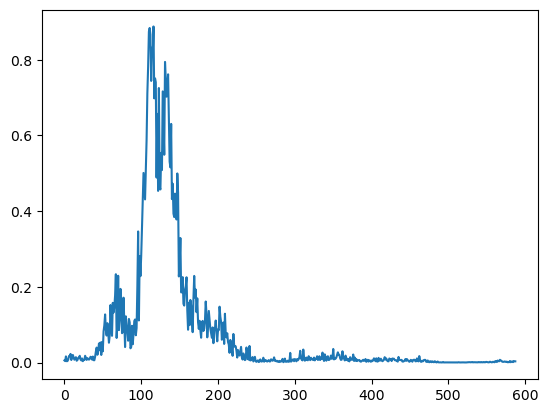

tmd prediction by DeepTMHMM


tmd ['W', 'Y', 'I', 'W', 'L', 'G', 'F', 'I', 'A', 'G', 'L', 'I', 'A', 'I', 'V', 'M', 'V', 'T', 'I', 'M', 'L']
signal []
vfp predicted: 0
score vfp predicted: 0.0055767893791198

 max score predicted

 top scores
     Unnamed: 0   entity     score  index word  start  end  class predicted  \
116         116  LABEL_1  0.888007    117    F    NaN  NaN                1   
111         111  LABEL_1  0.884042    112    F    NaN  NaN                1   
110         110  LABEL_1  0.874113    111    D    NaN  NaN                1   
112         112  LABEL_1  0.866586    113    G    NaN  NaN                1   
114         114  LABEL_1  0.831909    115    F    NaN  NaN                1   

     prob_class_0  prob_class_1  
116      0.111993      0.888007  
111      0.115958      0.884042  
110      0.125887      0.874113  
112      0.133414      0.866586  
114      0.168091      0.831909  
index of true 0


In [43]:
# T6 ESM2b
model_name_specific = '/seq_transformers_token_10KFOLD_cluster80_epoch5'   # epochs 5

output(model_name_specific)


################################
105
Envelope glycoprotein
PISLTVALMLGGITVGGMARN
vfp model prediction


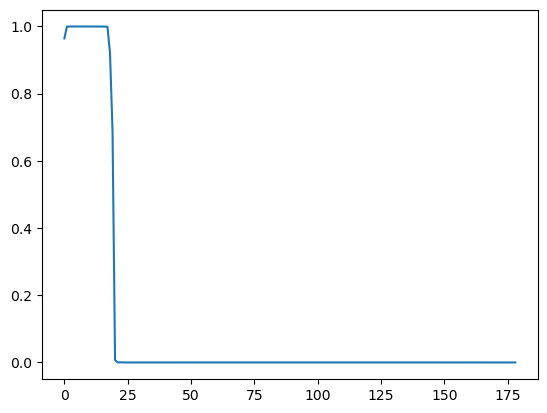

tmd prediction by DeepTMHMM


tmd ['L', 'M', 'I', 'L', 'L', 'L', 'I', 'L', 'L', 'F']
signal ['D', 'P', 'I', 'S', 'L', 'T', 'V', 'A', 'L', 'M']
vfp predicted: 1
score vfp predicted: 0.9995342493057252

 max score predicted

 top scores
    Unnamed: 0   entity     score  index word  start  end  class predicted  \
7            7  LABEL_1  0.999865      8    A    NaN  NaN                1   
3            3  LABEL_1  0.999858      4    S    NaN  NaN                1   
5            5  LABEL_1  0.999851      6    T    NaN  NaN                1   
14          14  LABEL_1  0.999843     15    T    NaN  NaN                1   
8            8  LABEL_1  0.999837      9    L    NaN  NaN                1   

    prob_class_0  prob_class_1  
7       0.000135      0.999865  
3       0.000142      0.999858  
5       0.000149      0.999851  
14      0.000157      0.999843  
8       0.000163      0.999837  
index of true 1
################################
146
Genome polyprotein
LVAPPTLCSALYVEDAFGAVSLVGQAFTFRPR
vfp model prediction


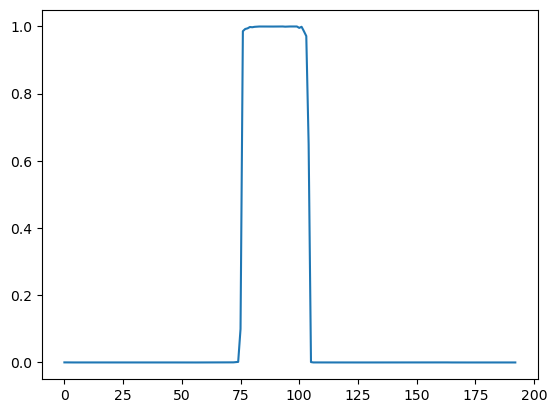

tmd prediction by DeepTMHMM


tmd ['M', 'M', 'M', 'N', 'W', 'S', 'P', 'A', 'I', 'G', 'L', 'V', 'I', 'T', 'F', 'F', 'D', 'L', 'V', 'V', 'G', 'A', 'H', 'W', 'G', 'V', 'M', 'A', 'G', 'L', 'A', 'Y', 'F', 'S', 'W', 'A', 'K', 'V', 'V', 'I', 'V', 'L', 'I', 'M', 'F', 'S', 'G', 'V', 'D']
signal []
vfp predicted: 0
score vfp predicted: 0.0017603635787963

 max score predicted

 top scores
    Unnamed: 0   entity     score  index word  start  end  class predicted  \
93          93  LABEL_1  0.999836     94    V    NaN  NaN                1   
96          96  LABEL_1  0.999817     97    V    NaN  NaN                1   
85          85  LABEL_1  0.999809     86    Y    NaN  NaN                1   
97          97  LABEL_1  0.999790     98    G    NaN  NaN                1   
99          99  LABEL_1  0.999784    100    A    NaN  NaN                1   

    prob_class_0  prob_class_1  
93      0.000164      0.999836  
96      0.000183      0.999817  
85      0.000191      0.999809  
97      0.000210      0.999790  
99      0.0002

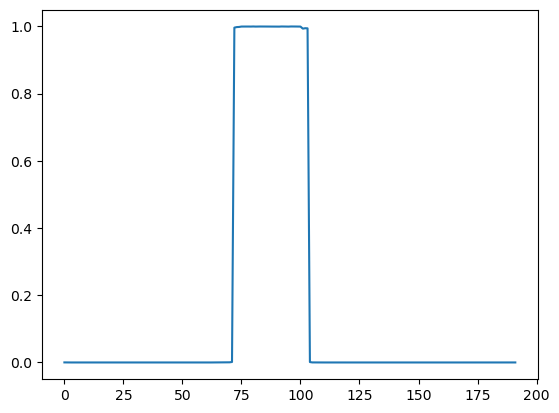

tmd prediction by DeepTMHMM


tmd ['M', 'M', 'V', 'G', 'A', 'A', 'T', 'L', 'C', 'S', 'A', 'L', 'Y', 'V', 'G', 'D', 'L', 'G', 'A', 'L', 'F', 'L', 'V', 'G', 'Q', 'G', 'F', 'A', 'W', 'D', 'M', 'M', 'M', 'N', 'W', 'S', 'P', 'A', 'M', 'T', 'L', 'I', 'V', 'M', 'F', 'D', 'L', 'V', 'I', 'G', 'A', 'H', 'W', 'G', 'V', 'M', 'A', 'G', 'V', 'A', 'Y', 'Y', 'S', 'M', 'A', 'K', 'V', 'F', 'L', 'V', 'L', 'C', 'L', 'F', 'S', 'G', 'V', 'D']
signal []
vfp predicted: 1
score vfp predicted: 0.9980837106704712

 max score predicted

 top scores
    Unnamed: 0   entity     score  index word  start  end  class predicted  \
96          96  LABEL_1  0.999897     97    G    NaN  NaN                1   
80          80  LABEL_1  0.999885     81    C    NaN  NaN                1   
92          92  LABEL_1  0.999865     93    L    NaN  NaN                1   
77          77  LABEL_1  0.999829     78    A    NaN  NaN                1   
83          83  LABEL_1  0.999814     84    L    NaN  NaN                1   

    prob_class_0  prob_class_1  
9

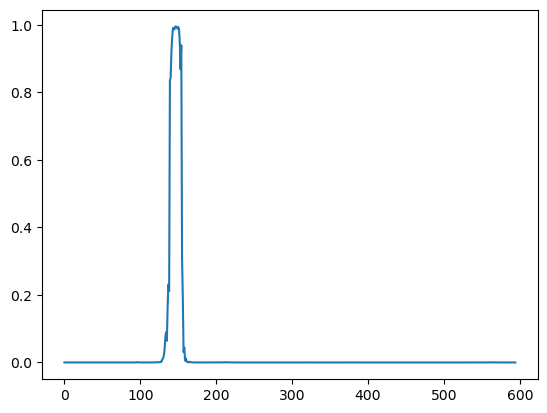

tmd prediction by DeepTMHMM


tmd ['W', 'Y', 'V', 'W', 'L', 'L', 'I', 'C', 'L', 'A', 'G', 'V', 'A', 'M', 'L', 'V', 'L', 'L', 'F', 'F', 'I']
signal []
vfp predicted: 0
score vfp predicted: 0.0001269578933715

 max score predicted

 top scores
     Unnamed: 0   entity     score  index word  start  end  class predicted  \
147         147  LABEL_1  0.994875    148    I    NaN  NaN                1   
146         146  LABEL_1  0.994680    147    A    NaN  NaN                1   
150         150  LABEL_1  0.993533    151    L    NaN  NaN                1   
148         148  LABEL_1  0.991014    149    E    NaN  NaN                1   
143         143  LABEL_1  0.990525    144    S    NaN  NaN                1   

     prob_class_0  prob_class_1  
147      0.005125      0.994875  
146      0.005320      0.994680  
150      0.006467      0.993533  
148      0.008986      0.991014  
143      0.009475      0.990525  
index of true 204
################################
225
Envelope glycoprotein gp160 (Env polyprotein) 
AVGMGAV

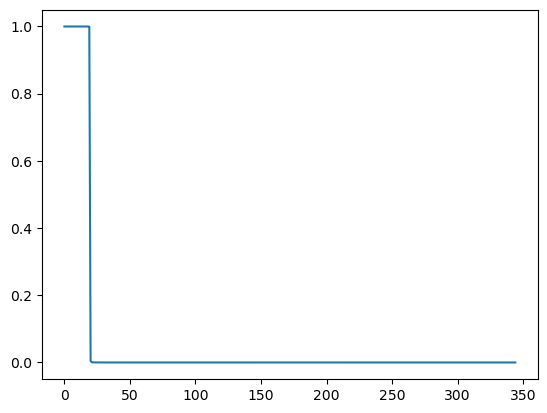

tmd prediction by DeepTMHMM


tmd ['I', 'F', 'I', 'M', 'I', 'V', 'G', 'G', 'L', 'I']
signal ['A', 'V', 'G', 'M', 'G', 'A', 'V', 'L', 'F', 'G']
vfp predicted: 1
score vfp predicted: 0.9998254179954528

 max score predicted

 top scores
    Unnamed: 0   entity     score  index word  start  end  class predicted  \
12          12  LABEL_1  0.999962     13    G    NaN  NaN                1   
5            5  LABEL_1  0.999945      6    A    NaN  NaN                1   
13          13  LABEL_1  0.999944     14    A    NaN  NaN                1   
11          11  LABEL_1  0.999944     12    L    NaN  NaN                1   
9            9  LABEL_1  0.999943     10    G    NaN  NaN                1   

    prob_class_0  prob_class_1  
12      0.000038      0.999962  
5       0.000055      0.999945  
13      0.000056      0.999944  
11      0.000056      0.999944  
9       0.000057      0.999943  
index of true 0
################################
265
Envelope glycoprotein gp160 (Env polyprotein) 
AAGLGALFLGFLGDSREHMGA
vfp mo

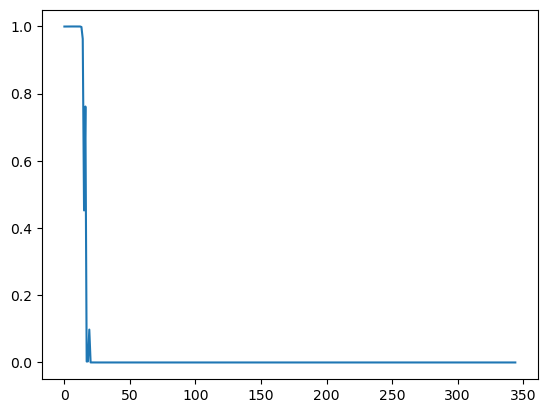

tmd prediction by DeepTMHMM


tmd ['I', 'K', 'I', 'F', 'I', 'M', 'I', 'V', 'G', 'G', 'L', 'I', 'G', 'L', 'R', 'I', 'V', 'F', 'A', 'V', 'L']
signal []
vfp predicted: 1
score vfp predicted: 0.999744474887848

 max score predicted

 top scores
   Unnamed: 0   entity     score  index word  start  end  class predicted  \
6           6  LABEL_1  0.999934      7    L    NaN  NaN                1   
5           5  LABEL_1  0.999924      6    A    NaN  NaN                1   
8           8  LABEL_1  0.999907      9    L    NaN  NaN                1   
7           7  LABEL_1  0.999881      8    F    NaN  NaN                1   
4           4  LABEL_1  0.999872      5    G    NaN  NaN                1   

   prob_class_0  prob_class_1  
6      0.000066      0.999934  
5      0.000076      0.999924  
8      0.000093      0.999907  
7      0.000119      0.999881  
4      0.000128      0.999872  
index of true 0
################################
574
Pre-glycoprotein polyprotein GP complex
GTFTWTLSDSSGVENPGGYCLTKWMILAAELKCFGNTAV
v

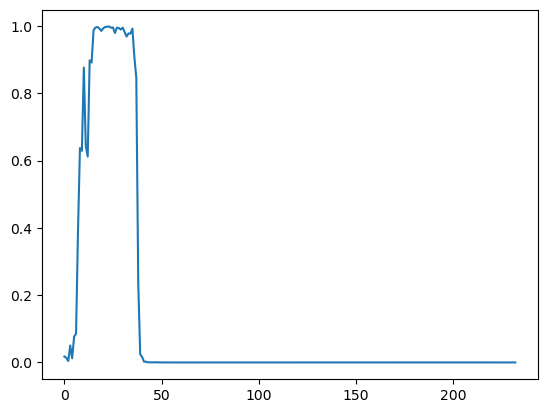

tmd prediction by DeepTMHMM


tmd ['L', 'M', 'D', 'L', 'L', 'M', 'F', 'S', 'T', 'S']
signal []
vfp predicted: 0
score vfp predicted: 0.0176075100898742

 max score predicted

 top scores
    Unnamed: 0   entity     score  index word  start  end  class predicted  \
23          23  LABEL_1  0.998428     24    W    NaN  NaN                1   
22          22  LABEL_1  0.997757     23    K    NaN  NaN                1   
21          21  LABEL_1  0.996820     22    T    NaN  NaN                1   
17          17  LABEL_1  0.996742     18    G    NaN  NaN                1   
25          25  LABEL_1  0.995562     26    I    NaN  NaN                1   

    prob_class_0  prob_class_1  
23      0.001572      0.998428  
22      0.002243      0.997757  
21      0.003180      0.996820  
17      0.003258      0.996742  
25      0.004438      0.995562  
index of true 0
################################
618
fusion glycoprotein F0
FLGLILGLGAAVTAGVALAKT
vfp model prediction


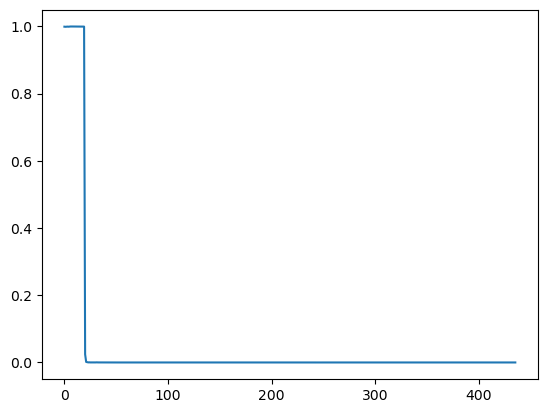

tmd prediction by DeepTMHMM


tmd ['L', 'L', 'F', 'V', 'V', 'M', 'L', 'I', 'I', 'I', 'M', 'A', 'V', 'I', 'G', 'F', 'I', 'L', 'Y']
signal []
vfp predicted: 1
score vfp predicted: 0.9992517828941344

 max score predicted

 top scores
    Unnamed: 0   entity     score  index word  start  end  class predicted  \
16          16  LABEL_1  0.999854     17    A    NaN  NaN                1   
12          12  LABEL_1  0.999844     13    T    NaN  NaN                1   
10          10  LABEL_1  0.999840     11    A    NaN  NaN                1   
14          14  LABEL_1  0.999822     15    G    NaN  NaN                1   
13          13  LABEL_1  0.999815     14    A    NaN  NaN                1   

    prob_class_0  prob_class_1  
16      0.000146      0.999854  
12      0.000156      0.999844  
10      0.000160      0.999840  
14      0.000178      0.999822  
13      0.000185      0.999815  
index of true 0
################################
779
G glycoprotein
[FRWYGPKY CGYATVT]
vfp model prediction


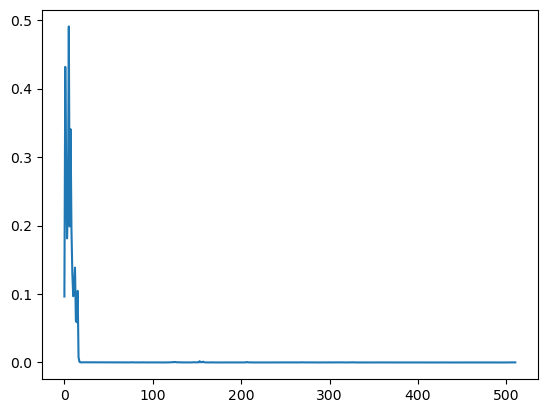

tmd prediction by DeepTMHMM


tmd ['F', 'F', 'F', 'I', 'I', 'G', 'L', 'I', 'I', 'G', 'L', 'F', 'L', 'V', 'L', 'R', 'V', 'G', 'I', 'Y', 'L']
signal ['M', 'K', 'C', 'L', 'L', 'Y', 'L', 'A', 'F', 'L', 'S', 'I', 'G', 'V', 'N', 'C']
vfp predicted: 0
score vfp predicted: 0.0963110923767089

 max score predicted

 top scores
   Unnamed: 0   entity     score  index word  start  end  class predicted  \
5           5  LABEL_0  0.509414      6    Y    NaN  NaN                0   
1           1  LABEL_0  0.568366      2    K    NaN  NaN                0   
7           7  LABEL_0  0.659484      8    A    NaN  NaN                0   
2           2  LABEL_0  0.722784      3    C    NaN  NaN                0   
4           4  LABEL_0  0.776081      5    L    NaN  NaN                0   

   prob_class_0  prob_class_1  
5      0.509414      0.490586  
1      0.568366      0.431633  
7      0.659484      0.340516  
2      0.722784      0.277216  
4      0.776081      0.223919  
index of true 0
################################
804
Sp

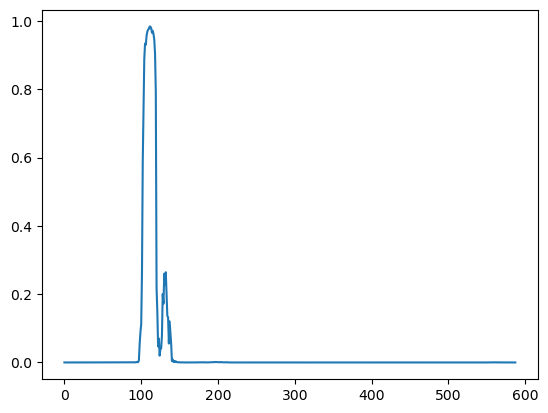

tmd prediction by DeepTMHMM


tmd ['W', 'Y', 'I', 'W', 'L', 'G', 'F', 'I', 'A', 'G', 'L', 'I', 'A', 'I', 'V', 'M', 'V', 'T', 'I', 'M', 'L']
signal []
vfp predicted: 0
score vfp predicted: 0.0001662969589233

 max score predicted

 top scores
     Unnamed: 0   entity     score  index word  start  end  class predicted  \
111         111  LABEL_1  0.983745    112    F    NaN  NaN                1   
112         112  LABEL_1  0.983034    113    G    NaN  NaN                1   
113         113  LABEL_1  0.978411    114    G    NaN  NaN                1   
110         110  LABEL_1  0.976673    111    D    NaN  NaN                1   
109         109  LABEL_1  0.974780    110    K    NaN  NaN                1   

     prob_class_0  prob_class_1  
111      0.016255      0.983745  
112      0.016966      0.983034  
113      0.021589      0.978411  
110      0.023327      0.976673  
109      0.025220      0.974780  
index of true 0


In [44]:
# T6 ESM2b

model_name_specific = '/seq_transformers_token_10KFOLD_cluster80_epoch10'   # epochs 10 
output(model_name_specific)


################################
105
Envelope glycoprotein
PISLTVALMLGGITVGGMARN
vfp model prediction


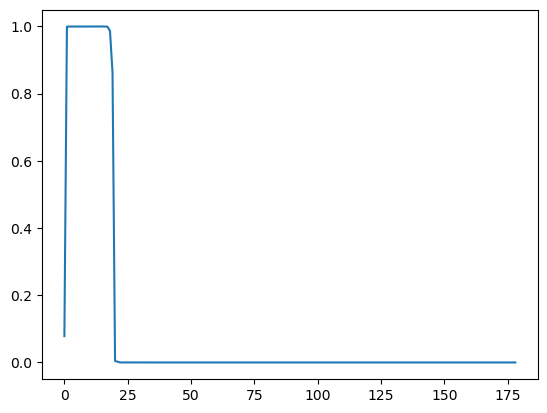

tmd prediction by DeepTMHMM


tmd ['L', 'M', 'I', 'L', 'L', 'L', 'I', 'L', 'L', 'F']
signal ['D', 'P', 'I', 'S', 'L', 'T', 'V', 'A', 'L', 'M']
vfp predicted: 1
score vfp predicted: 0.9993613362312316

 max score predicted

 top scores
    Unnamed: 0   entity     score  index word  start  end  class predicted  \
15          15  LABEL_1  0.999866     16    V    NaN  NaN                1   
16          16  LABEL_1  0.999827     17    G    NaN  NaN                1   
12          12  LABEL_1  0.999814     13    G    NaN  NaN                1   
5            5  LABEL_1  0.999812      6    T    NaN  NaN                1   
14          14  LABEL_1  0.999808     15    T    NaN  NaN                1   

    prob_class_0  prob_class_1  
15      0.000134      0.999866  
16      0.000172      0.999828  
12      0.000186      0.999814  
5       0.000188      0.999812  
14      0.000192      0.999808  
index of true 1
################################
146
Genome polyprotein
LVAPPTLCSALYVEDAFGAVSLVGQAFTFRPR
vfp model prediction


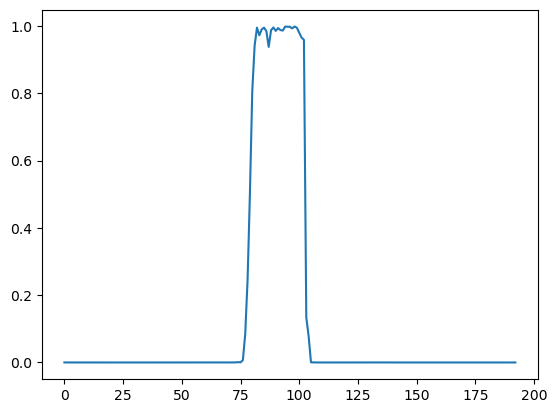

tmd prediction by DeepTMHMM


tmd ['M', 'M', 'M', 'N', 'W', 'S', 'P', 'A', 'I', 'G', 'L', 'V', 'I', 'T', 'F', 'F', 'D', 'L', 'V', 'V', 'G', 'A', 'H', 'W', 'G', 'V', 'M', 'A', 'G', 'L', 'A', 'Y', 'F', 'S', 'W', 'A', 'K', 'V', 'V', 'I', 'V', 'L', 'I', 'M', 'F', 'S', 'G', 'V', 'D']
signal []
vfp predicted: 0
score vfp predicted: 0.0010919570922851

 max score predicted

 top scores
    Unnamed: 0   entity     score  index word  start  end  class predicted  \
98          98  LABEL_1  0.998472     99    Q    NaN  NaN                1   
94          94  LABEL_1  0.998061     95    S    NaN  NaN                1   
95          95  LABEL_1  0.997799     96    L    NaN  NaN                1   
96          96  LABEL_1  0.997538     97    V    NaN  NaN                1   
89          89  LABEL_1  0.995619     90    A    NaN  NaN                1   

    prob_class_0  prob_class_1  
98      0.001528      0.998472  
94      0.001939      0.998061  
95      0.002201      0.997799  
96      0.002462      0.997538  
89      0.0043

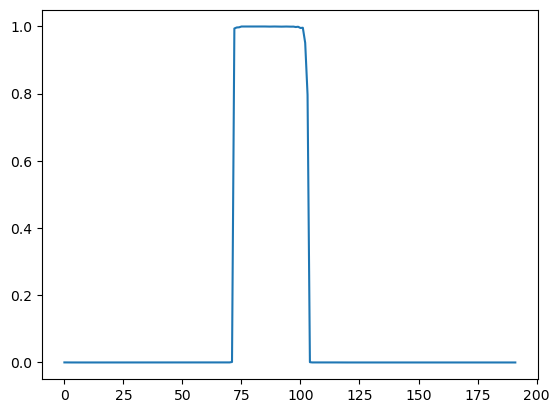

tmd prediction by DeepTMHMM


tmd ['M', 'M', 'V', 'G', 'A', 'A', 'T', 'L', 'C', 'S', 'A', 'L', 'Y', 'V', 'G', 'D', 'L', 'G', 'A', 'L', 'F', 'L', 'V', 'G', 'Q', 'G', 'F', 'A', 'W', 'D', 'M', 'M', 'M', 'N', 'W', 'S', 'P', 'A', 'M', 'T', 'L', 'I', 'V', 'M', 'F', 'D', 'L', 'V', 'I', 'G', 'A', 'H', 'W', 'G', 'V', 'M', 'A', 'G', 'V', 'A', 'Y', 'Y', 'S', 'M', 'A', 'K', 'V', 'F', 'L', 'V', 'L', 'C', 'L', 'F', 'S', 'G', 'V', 'D']
signal []
vfp predicted: 1
score vfp predicted: 0.9969246983528136

 max score predicted

 top scores
    Unnamed: 0   entity     score  index word  start  end  class predicted  \
82          82  LABEL_1  0.999900     83    A    NaN  NaN                1   
78          78  LABEL_1  0.999892     79    T    NaN  NaN                1   
81          81  LABEL_1  0.999864     82    S    NaN  NaN                1   
85          85  LABEL_1  0.999854     86    V    NaN  NaN                1   
79          79  LABEL_1  0.999847     80    L    NaN  NaN                1   

    prob_class_0  prob_class_1  
8

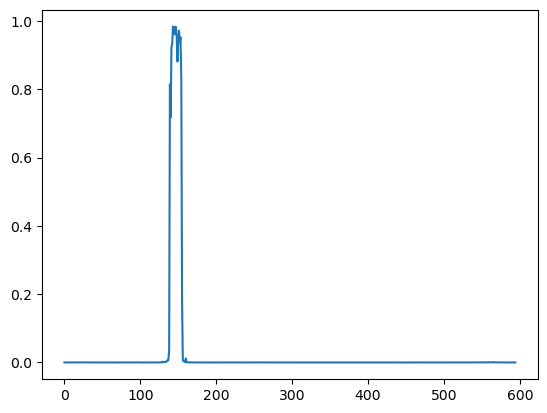

tmd prediction by DeepTMHMM


tmd ['W', 'Y', 'V', 'W', 'L', 'L', 'I', 'C', 'L', 'A', 'G', 'V', 'A', 'M', 'L', 'V', 'L', 'L', 'F', 'F', 'I']
signal []
vfp predicted: 0
score vfp predicted: 5.7816505432128906e-05

 max score predicted

 top scores
     Unnamed: 0   entity     score  index word  start  end  class predicted  \
143         143  LABEL_1  0.984231    144    S    NaN  NaN                1   
146         146  LABEL_1  0.983430    147    A    NaN  NaN                1   
147         147  LABEL_1  0.982144    148    I    NaN  NaN                1   
144         144  LABEL_1  0.973494    145    R    NaN  NaN                1   
151         151  LABEL_1  0.971751    152    L    NaN  NaN                1   

     prob_class_0  prob_class_1  
143      0.015769      0.984231  
146      0.016570      0.983430  
147      0.017856      0.982144  
144      0.026506      0.973494  
151      0.028249      0.971751  
index of true 204
################################
225
Envelope glycoprotein gp160 (Env polyprotein) 
AVG

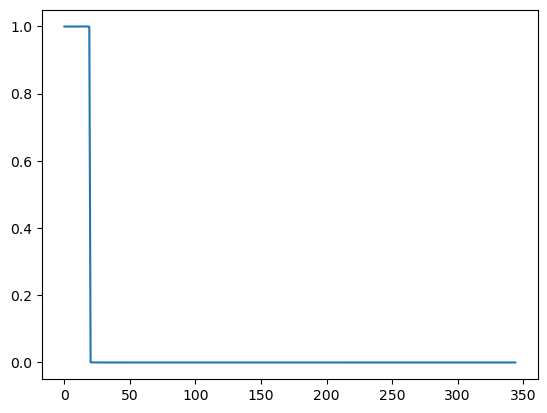

tmd prediction by DeepTMHMM


tmd ['I', 'F', 'I', 'M', 'I', 'V', 'G', 'G', 'L', 'I']
signal ['A', 'V', 'G', 'M', 'G', 'A', 'V', 'L', 'F', 'G']
vfp predicted: 1
score vfp predicted: 0.99977308511734

 max score predicted

 top scores
    Unnamed: 0   entity     score  index word  start  end  class predicted  \
4            4  LABEL_1  0.999871      5    G    NaN  NaN                1   
15          15  LABEL_1  0.999864     16    G    NaN  NaN                1   
17          17  LABEL_1  0.999855     18    T    NaN  NaN                1   
3            3  LABEL_1  0.999809      4    M    NaN  NaN                1   
12          12  LABEL_1  0.999806     13    G    NaN  NaN                1   

    prob_class_0  prob_class_1  
4       0.000129      0.999871  
15      0.000136      0.999864  
17      0.000145      0.999855  
3       0.000191      0.999809  
12      0.000194      0.999806  
index of true 0
################################
265
Envelope glycoprotein gp160 (Env polyprotein) 
AAGLGALFLGFLGDSREHMGA
vfp mode

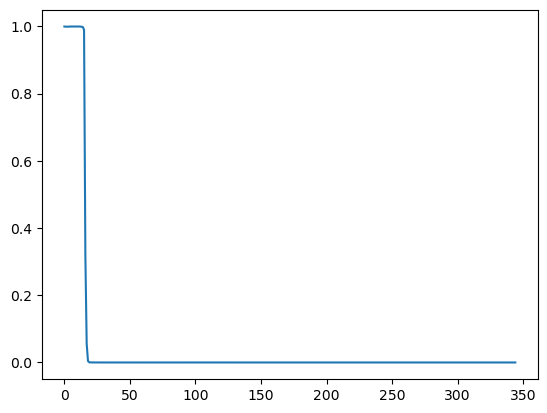

tmd prediction by DeepTMHMM


tmd ['I', 'K', 'I', 'F', 'I', 'M', 'I', 'V', 'G', 'G', 'L', 'I', 'G', 'L', 'R', 'I', 'V', 'F', 'A', 'V', 'L']
signal []
vfp predicted: 1
score vfp predicted: 0.9997249245643616

 max score predicted

 top scores
    Unnamed: 0   entity     score  index word  start  end  class predicted  \
10          10  LABEL_1  0.999805     11    F    NaN  NaN                1   
0            0  LABEL_1  0.999725      1    A    NaN  NaN                1   
12          12  LABEL_1  0.999703     13    G    NaN  NaN                1   
5            5  LABEL_1  0.999699      6    A    NaN  NaN                1   
8            8  LABEL_1  0.999623      9    L    NaN  NaN                1   

    prob_class_0  prob_class_1  
10      0.000195      0.999805  
0       0.000275      0.999725  
12      0.000297      0.999703  
5       0.000301      0.999699  
8       0.000377      0.999623  
index of true 0
################################
574
Pre-glycoprotein polyprotein GP complex
GTFTWTLSDSSGVENPGGYCLTKWMILA

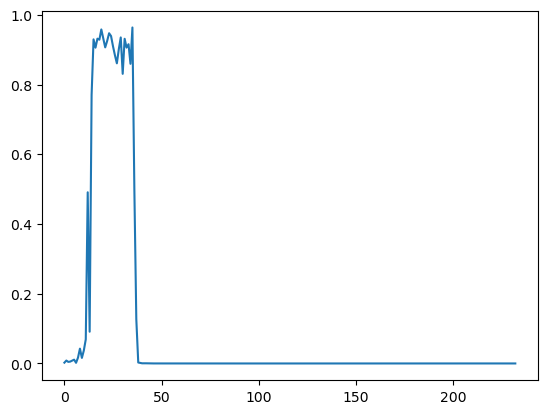

tmd prediction by DeepTMHMM


tmd ['L', 'M', 'D', 'L', 'L', 'M', 'F', 'S', 'T', 'S']
signal []
vfp predicted: 0
score vfp predicted: 0.0023495554924011

 max score predicted

 top scores
    Unnamed: 0   entity     score  index word  start  end  class predicted  \
35          35  LABEL_1  0.964045     36    N    NaN  NaN                1   
19          19  LABEL_1  0.958433     20    C    NaN  NaN                1   
23          23  LABEL_1  0.947538     24    W    NaN  NaN                1   
24          24  LABEL_1  0.939498     25    M    NaN  NaN                1   
29          29  LABEL_1  0.935461     30    E    NaN  NaN                1   

    prob_class_0  prob_class_1  
35      0.035955      0.964045  
19      0.041567      0.958433  
23      0.052462      0.947538  
24      0.060502      0.939498  
29      0.064539      0.935461  
index of true 0
################################
618
fusion glycoprotein F0
FLGLILGLGAAVTAGVALAKT
vfp model prediction


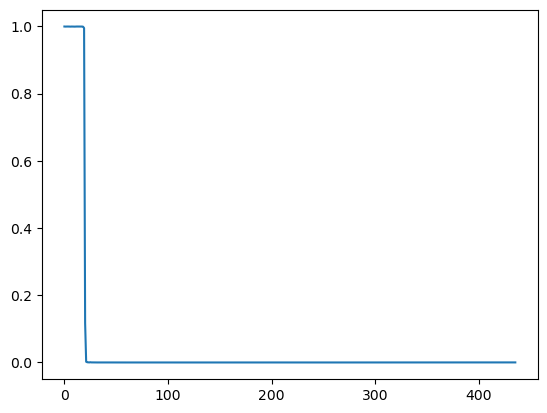

tmd prediction by DeepTMHMM


tmd ['L', 'L', 'F', 'V', 'V', 'M', 'L', 'I', 'I', 'I', 'M', 'A', 'V', 'I', 'G', 'F', 'I', 'L', 'Y']
signal []
vfp predicted: 1
score vfp predicted: 0.9997124075889589

 max score predicted

 top scores
    Unnamed: 0   entity     score  index word  start  end  class predicted  \
15          15  LABEL_1  0.999820     16    V    NaN  NaN                1   
16          16  LABEL_1  0.999810     17    A    NaN  NaN                1   
14          14  LABEL_1  0.999779     15    G    NaN  NaN                1   
13          13  LABEL_1  0.999721     14    A    NaN  NaN                1   
2            2  LABEL_1  0.999720      3    G    NaN  NaN                1   

    prob_class_0  prob_class_1  
15      0.000180      0.999820  
16      0.000190      0.999810  
14      0.000221      0.999779  
13      0.000279      0.999721  
2       0.000280      0.999720  
index of true 0
################################
779
G glycoprotein
[FRWYGPKY CGYATVT]
vfp model prediction


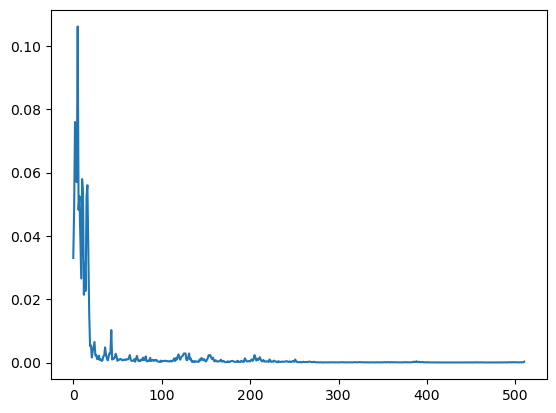

tmd prediction by DeepTMHMM


tmd ['F', 'F', 'F', 'I', 'I', 'G', 'L', 'I', 'I', 'G', 'L', 'F', 'L', 'V', 'L', 'R', 'V', 'G', 'I', 'Y', 'L']
signal ['M', 'K', 'C', 'L', 'L', 'Y', 'L', 'A', 'F', 'L', 'S', 'I', 'G', 'V', 'N', 'C']
vfp predicted: 0
score vfp predicted: 0.0330104827880859

 max score predicted

 top scores
    Unnamed: 0   entity     score  index word  start  end  class predicted  \
5            5  LABEL_0  0.893844      6    Y    NaN  NaN                0   
2            2  LABEL_0  0.924016      3    C    NaN  NaN                0   
3            3  LABEL_0  0.932192      4    L    NaN  NaN                0   
10          10  LABEL_0  0.942067     11    S    NaN  NaN                0   
4            4  LABEL_0  0.943036      5    L    NaN  NaN                0   

    prob_class_0  prob_class_1  
5       0.893844      0.106156  
2       0.924016      0.075984  
3       0.932192      0.067808  
10      0.942067      0.057933  
4       0.943036      0.056965  
index of true 0
###########################

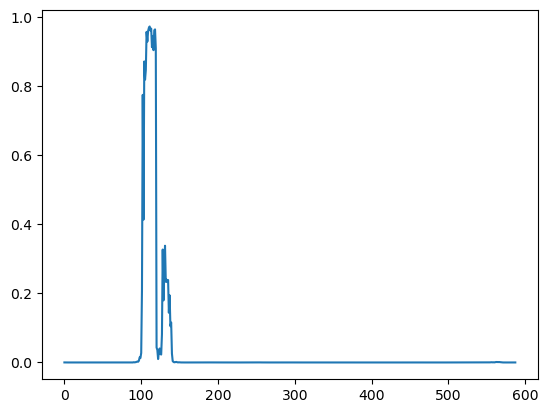

tmd prediction by DeepTMHMM


tmd ['W', 'Y', 'I', 'W', 'L', 'G', 'F', 'I', 'A', 'G', 'L', 'I', 'A', 'I', 'V', 'M', 'V', 'T', 'I', 'M', 'L']
signal []
vfp predicted: 0
score vfp predicted: 0.0001574754714965

 max score predicted

 top scores
     Unnamed: 0   entity     score  index word  start  end  class predicted  \
111         111  LABEL_1  0.972133    112    F    NaN  NaN                1   
110         110  LABEL_1  0.968471    111    D    NaN  NaN                1   
113         113  LABEL_1  0.966162    114    G    NaN  NaN                1   
118         118  LABEL_1  0.963726    119    Q    NaN  NaN                1   
117         117  LABEL_1  0.961090    118    S    NaN  NaN                1   

     prob_class_0  prob_class_1  
111      0.027867      0.972133  
110      0.031529      0.968471  
113      0.033838      0.966162  
118      0.036274      0.963726  
117      0.038910      0.961090  
index of true 0


In [45]:
# T6 ESM2b
model_name_specific = '/seq_transformers_token_10KFOLD_cluster80_epoch15'   # epochs 15 
 
output(model_name_specific)


################################
105
Envelope glycoprotein
PISLTVALMLGGITVGGMARN
vfp model prediction


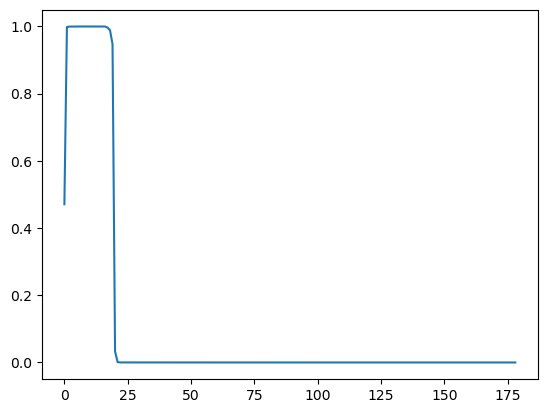

tmd prediction by DeepTMHMM


tmd ['L', 'M', 'I', 'L', 'L', 'L', 'I', 'L', 'L', 'F']
signal ['D', 'P', 'I', 'S', 'L', 'T', 'V', 'A', 'L', 'M']
vfp predicted: 1
score vfp predicted: 0.998415470123291

 max score predicted

 top scores
    Unnamed: 0   entity     score  index word  start  end  class predicted  \
10          10  LABEL_1  0.999961     11    L    NaN  NaN                1   
7            7  LABEL_1  0.999961      8    A    NaN  NaN                1   
11          11  LABEL_1  0.999960     12    G    NaN  NaN                1   
9            9  LABEL_1  0.999956     10    M    NaN  NaN                1   
8            8  LABEL_1  0.999953      9    L    NaN  NaN                1   

    prob_class_0  prob_class_1  
10      0.000039      0.999961  
7       0.000039      0.999961  
11      0.000040      0.999960  
9       0.000044      0.999956  
8       0.000047      0.999953  
index of true 1
################################
146
Genome polyprotein
LVAPPTLCSALYVEDAFGAVSLVGQAFTFRPR
vfp model prediction


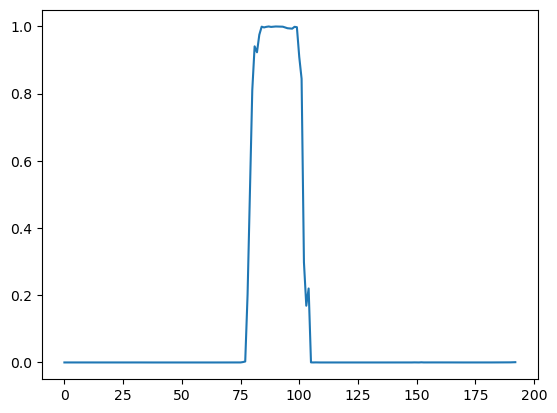

tmd prediction by DeepTMHMM


tmd ['M', 'M', 'M', 'N', 'W', 'S', 'P', 'A', 'I', 'G', 'L', 'V', 'I', 'T', 'F', 'F', 'D', 'L', 'V', 'V', 'G', 'A', 'H', 'W', 'G', 'V', 'M', 'A', 'G', 'L', 'A', 'Y', 'F', 'S', 'W', 'A', 'K', 'V', 'V', 'I', 'V', 'L', 'I', 'M', 'F', 'S', 'G', 'V', 'D']
signal []
vfp predicted: 0
score vfp predicted: 7.593631744384766e-05

 max score predicted

 top scores
    Unnamed: 0   entity     score  index word  start  end  class predicted  \
87          87  LABEL_1  0.999659     88    E    NaN  NaN                1   
90          90  LABEL_1  0.999643     91    F    NaN  NaN                1   
91          91  LABEL_1  0.999426     92    G    NaN  NaN                1   
92          92  LABEL_1  0.999364     93    A    NaN  NaN                1   
84          84  LABEL_1  0.999051     85    L    NaN  NaN                1   

    prob_class_0  prob_class_1  
87      0.000341      0.999659  
90      0.000357      0.999643  
91      0.000574      0.999426  
92      0.000636      0.999364  
84      0.0

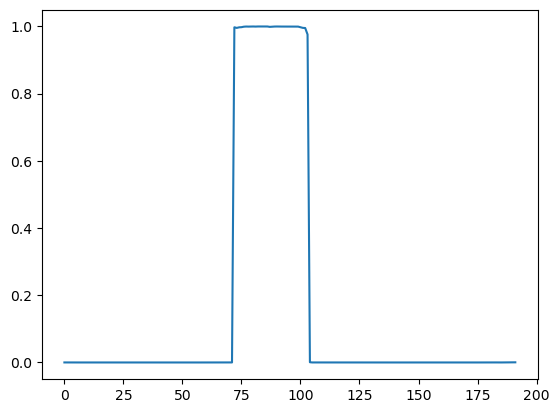

tmd prediction by DeepTMHMM


tmd ['M', 'M', 'V', 'G', 'A', 'A', 'T', 'L', 'C', 'S', 'A', 'L', 'Y', 'V', 'G', 'D', 'L', 'G', 'A', 'L', 'F', 'L', 'V', 'G', 'Q', 'G', 'F', 'A', 'W', 'D', 'M', 'M', 'M', 'N', 'W', 'S', 'P', 'A', 'M', 'T', 'L', 'I', 'V', 'M', 'F', 'D', 'L', 'V', 'I', 'G', 'A', 'H', 'W', 'G', 'V', 'M', 'A', 'G', 'V', 'A', 'Y', 'Y', 'S', 'M', 'A', 'K', 'V', 'F', 'L', 'V', 'L', 'C', 'L', 'F', 'S', 'G', 'V', 'D']
signal []
vfp predicted: 1
score vfp predicted: 0.9955697655677797

 max score predicted

 top scores
    Unnamed: 0   entity     score  index word  start  end  class predicted  \
82          82  LABEL_1  0.999847     83    A    NaN  NaN                1   
85          85  LABEL_1  0.999839     86    V    NaN  NaN                1   
83          83  LABEL_1  0.999823     84    L    NaN  NaN                1   
86          86  LABEL_1  0.999798     87    G    NaN  NaN                1   
90          90  LABEL_1  0.999789     91    G    NaN  NaN                1   

    prob_class_0  prob_class_1  
8

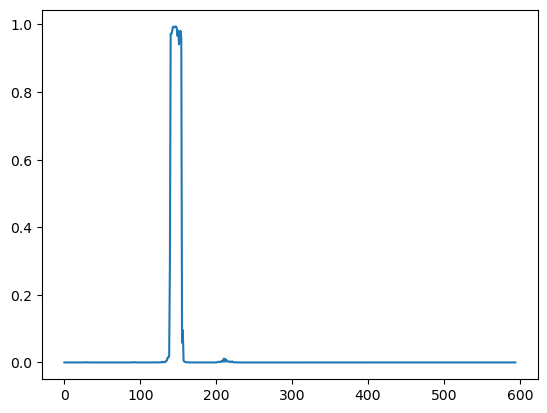

tmd prediction by DeepTMHMM


tmd ['W', 'Y', 'V', 'W', 'L', 'L', 'I', 'C', 'L', 'A', 'G', 'V', 'A', 'M', 'L', 'V', 'L', 'L', 'F', 'F', 'I']
signal []
vfp predicted: 0
score vfp predicted: 0.0022795796394348

 max score predicted

 top scores
     Unnamed: 0   entity     score  index word  start  end  class predicted  \
146         146  LABEL_1  0.994135    147    A    NaN  NaN                1   
147         147  LABEL_1  0.994056    148    I    NaN  NaN                1   
143         143  LABEL_1  0.993247    144    S    NaN  NaN                1   
144         144  LABEL_1  0.992991    145    R    NaN  NaN                1   
145         145  LABEL_1  0.991199    146    S    NaN  NaN                1   

     prob_class_0  prob_class_1  
146      0.005865      0.994135  
147      0.005944      0.994056  
143      0.006753      0.993247  
144      0.007009      0.992991  
145      0.008801      0.991199  
index of true 204
################################
225
Envelope glycoprotein gp160 (Env polyprotein) 
AVGMGAV

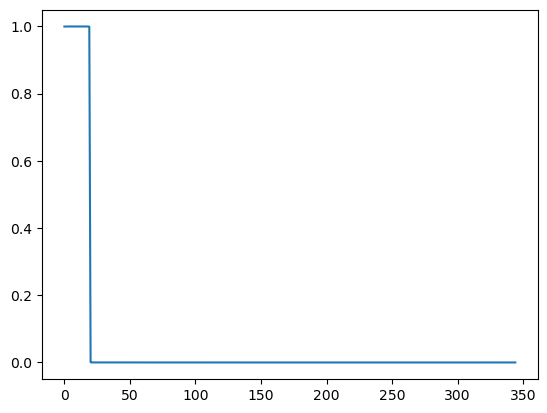

tmd prediction by DeepTMHMM


tmd ['I', 'F', 'I', 'M', 'I', 'V', 'G', 'G', 'L', 'I']
signal ['A', 'V', 'G', 'M', 'G', 'A', 'V', 'L', 'F', 'G']
vfp predicted: 1
score vfp predicted: 0.9997103810310364

 max score predicted

 top scores
    Unnamed: 0   entity     score  index word  start  end  class predicted  \
4            4  LABEL_1  0.999971      5    G    NaN  NaN                1   
13          13  LABEL_1  0.999965     14    A    NaN  NaN                1   
3            3  LABEL_1  0.999965      4    M    NaN  NaN                1   
8            8  LABEL_1  0.999964      9    F    NaN  NaN                1   
14          14  LABEL_1  0.999961     15    A    NaN  NaN                1   

    prob_class_0  prob_class_1  
4       0.000029      0.999971  
13      0.000035      0.999965  
3       0.000035      0.999965  
8       0.000036      0.999964  
14      0.000039      0.999961  
index of true 0
################################
265
Envelope glycoprotein gp160 (Env polyprotein) 
AAGLGALFLGFLGDSREHMGA
vfp mo

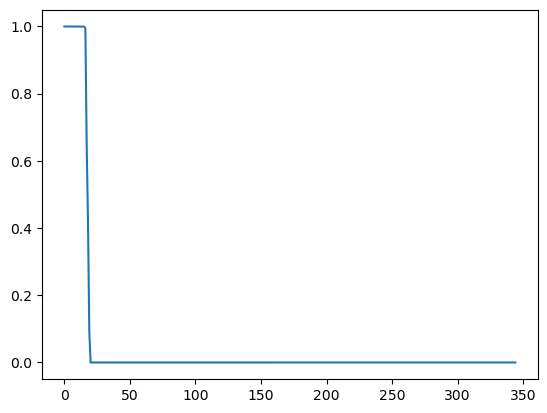

tmd prediction by DeepTMHMM


tmd ['I', 'K', 'I', 'F', 'I', 'M', 'I', 'V', 'G', 'G', 'L', 'I', 'G', 'L', 'R', 'I', 'V', 'F', 'A', 'V', 'L']
signal []
vfp predicted: 1
score vfp predicted: 0.9998216032981871

 max score predicted

 top scores
   Unnamed: 0   entity     score  index word  start  end  class predicted  \
4           4  LABEL_1  0.999977      5    G    NaN  NaN                1   
6           6  LABEL_1  0.999977      7    L    NaN  NaN                1   
9           9  LABEL_1  0.999975     10    G    NaN  NaN                1   
8           8  LABEL_1  0.999974      9    L    NaN  NaN                1   
3           3  LABEL_1  0.999972      4    L    NaN  NaN                1   

   prob_class_0  prob_class_1  
4      0.000023      0.999977  
6      0.000023      0.999977  
9      0.000025      0.999975  
8      0.000026      0.999974  
3      0.000028      0.999972  
index of true 0
################################
574
Pre-glycoprotein polyprotein GP complex
GTFTWTLSDSSGVENPGGYCLTKWMILAAELKCFGNTAV


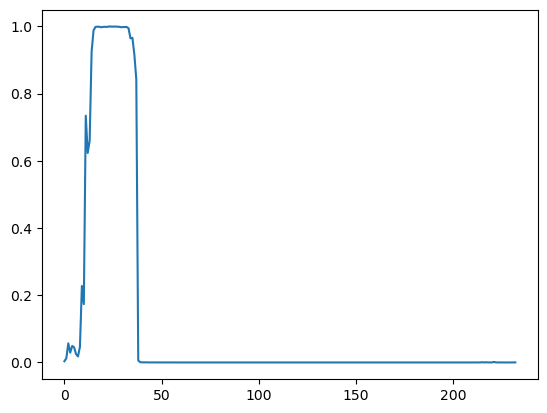

tmd prediction by DeepTMHMM


tmd ['L', 'M', 'D', 'L', 'L', 'M', 'F', 'S', 'T', 'S']
signal []
vfp predicted: 0
score vfp predicted: 0.0037072300910949

 max score predicted

 top scores
    Unnamed: 0   entity     score  index word  start  end  class predicted  \
23          23  LABEL_1  0.999774     24    W    NaN  NaN                1   
26          26  LABEL_1  0.999765     27    L    NaN  NaN                1   
24          24  LABEL_1  0.999324     25    M    NaN  NaN                1   
17          17  LABEL_1  0.999177     18    G    NaN  NaN                1   
25          25  LABEL_1  0.999176     26    I    NaN  NaN                1   

    prob_class_0  prob_class_1  
23      0.000226      0.999774  
26      0.000235      0.999765  
24      0.000676      0.999324  
17      0.000823      0.999177  
25      0.000824      0.999176  
index of true 0
################################
618
fusion glycoprotein F0
FLGLILGLGAAVTAGVALAKT
vfp model prediction


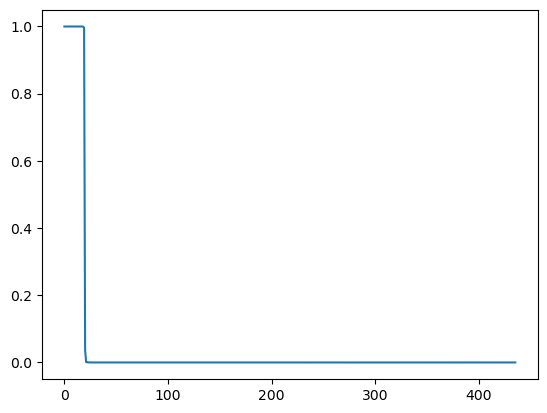

tmd prediction by DeepTMHMM


tmd ['L', 'L', 'F', 'V', 'V', 'M', 'L', 'I', 'I', 'I', 'M', 'A', 'V', 'I', 'G', 'F', 'I', 'L', 'Y']
signal []
vfp predicted: 1
score vfp predicted: 0.999828577041626

 max score predicted

 top scores
    Unnamed: 0   entity     score  index word  start  end  class predicted  \
3            3  LABEL_1  0.999978      4    L    NaN  NaN                1   
9            9  LABEL_1  0.999972     10    A    NaN  NaN                1   
13          13  LABEL_1  0.999971     14    A    NaN  NaN                1   
2            2  LABEL_1  0.999969      3    G    NaN  NaN                1   
11          11  LABEL_1  0.999962     12    V    NaN  NaN                1   

    prob_class_0  prob_class_1  
3       0.000022      0.999978  
9       0.000028      0.999972  
13      0.000029      0.999971  
2       0.000031      0.999969  
11      0.000038      0.999962  
index of true 0
################################
779
G glycoprotein
[FRWYGPKY CGYATVT]
vfp model prediction


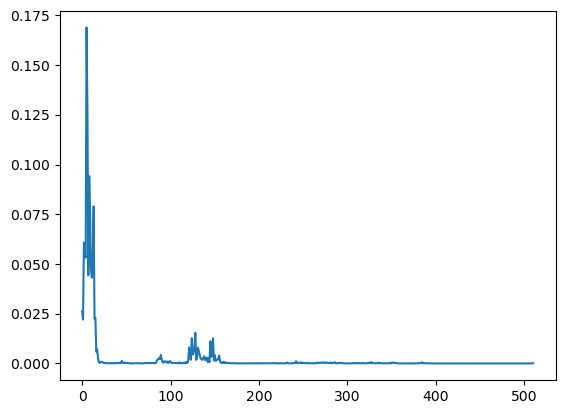

tmd prediction by DeepTMHMM


tmd ['F', 'F', 'F', 'I', 'I', 'G', 'L', 'I', 'I', 'G', 'L', 'F', 'L', 'V', 'L', 'R', 'V', 'G', 'I', 'Y', 'L']
signal ['M', 'K', 'C', 'L', 'L', 'Y', 'L', 'A', 'F', 'L', 'S', 'I', 'G', 'V', 'N', 'C']
vfp predicted: 0
score vfp predicted: 0.0262555480003356

 max score predicted

 top scores
    Unnamed: 0   entity     score  index word  start  end  class predicted  \
5            5  LABEL_0  0.831094      6    Y    NaN  NaN                0   
6            6  LABEL_0  0.873594      7    L    NaN  NaN                0   
8            8  LABEL_0  0.905814      9    F    NaN  NaN                0   
13          13  LABEL_0  0.921017     14    V    NaN  NaN                0   
9            9  LABEL_0  0.924868     10    L    NaN  NaN                0   

    prob_class_0  prob_class_1  
5       0.831094      0.168906  
6       0.873594      0.126406  
8       0.905814      0.094186  
13      0.921017      0.078983  
9       0.924868      0.075132  
index of true 0
###########################

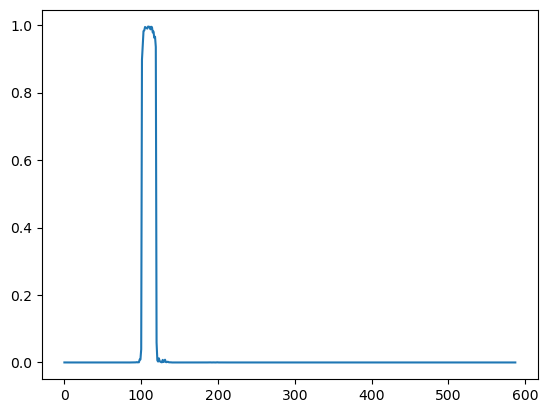

tmd prediction by DeepTMHMM


tmd ['W', 'Y', 'I', 'W', 'L', 'G', 'F', 'I', 'A', 'G', 'L', 'I', 'A', 'I', 'V', 'M', 'V', 'T', 'I', 'M', 'L']
signal []
vfp predicted: 0
score vfp predicted: 0.0001082420349121

 max score predicted

 top scores
     Unnamed: 0   entity     score  index word  start  end  class predicted  \
109         109  LABEL_1  0.996166    110    K    NaN  NaN                1   
113         113  LABEL_1  0.995413    114    G    NaN  NaN                1   
111         111  LABEL_1  0.995132    112    F    NaN  NaN                1   
110         110  LABEL_1  0.994737    111    D    NaN  NaN                1   
105         105  LABEL_1  0.994630    106    T    NaN  NaN                1   

     prob_class_0  prob_class_1  
109      0.003834      0.996166  
113      0.004587      0.995413  
111      0.004868      0.995132  
110      0.005263      0.994737  
105      0.005370      0.994630  
index of true 0


In [46]:
# T6 ESM2b
model_name_specific = '/seq_transformers_token_10KFOLD_cluster80_epoch20_T6'  # epoch 20  

output(model_name_specific)


################################
105
Envelope glycoprotein
PISLTVALMLGGITVGGMARN
vfp model prediction


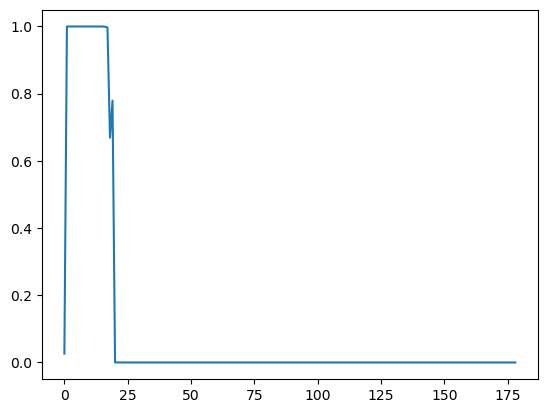

tmd prediction by DeepTMHMM


tmd ['L', 'M', 'I', 'L', 'L', 'L', 'I', 'L', 'L', 'F']
signal ['D', 'P', 'I', 'S', 'L', 'T', 'V', 'A', 'L', 'M']
vfp predicted: 1
score vfp predicted: 0.9999454021453856

 max score predicted

 top scores
    Unnamed: 0   entity     score  index word  start  end  class predicted  \
8            8  LABEL_1  0.999984      9    L    NaN  NaN                1   
9            9  LABEL_1  0.999983     10    M    NaN  NaN                1   
7            7  LABEL_1  0.999980      8    A    NaN  NaN                1   
13          13  LABEL_1  0.999980     14    I    NaN  NaN                1   
6            6  LABEL_1  0.999979      7    V    NaN  NaN                1   

    prob_class_0  prob_class_1  
8       0.000016      0.999984  
9       0.000017      0.999983  
7       0.000020      0.999980  
13      0.000020      0.999980  
6       0.000021      0.999979  
index of true 1
################################
146
Genome polyprotein
LVAPPTLCSALYVEDAFGAVSLVGQAFTFRPR
vfp model prediction


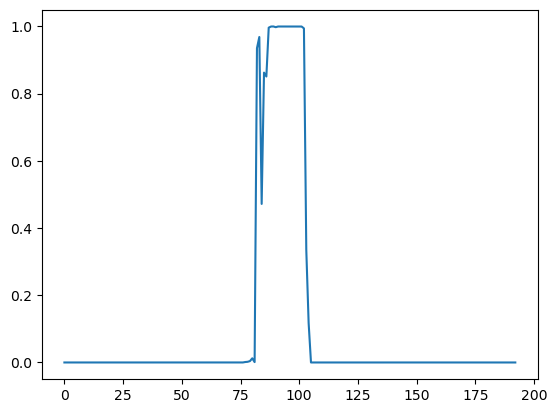

tmd prediction by DeepTMHMM


tmd ['M', 'M', 'M', 'N', 'W', 'S', 'P', 'A', 'I', 'G', 'L', 'V', 'I', 'T', 'F', 'F', 'D', 'L', 'V', 'V', 'G', 'A', 'H', 'W', 'G', 'V', 'M', 'A', 'G', 'L', 'A', 'Y', 'F', 'S', 'W', 'A', 'K', 'V', 'V', 'I', 'V', 'L', 'I', 'M', 'F', 'S', 'G', 'V', 'D']
signal []
vfp predicted: 0
score vfp predicted: 1.7523765563964844e-05

 max score predicted

 top scores
    Unnamed: 0   entity     score  index word  start  end  class predicted  \
92          92  LABEL_1  0.999886     93    A    NaN  NaN                1   
89          89  LABEL_1  0.999882     90    A    NaN  NaN                1   
99          99  LABEL_1  0.999871    100    A    NaN  NaN                1   
93          93  LABEL_1  0.999866     94    V    NaN  NaN                1   
96          96  LABEL_1  0.999813     97    V    NaN  NaN                1   

    prob_class_0  prob_class_1  
92      0.000114      0.999886  
89      0.000118      0.999882  
99      0.000129      0.999871  
93      0.000134      0.999866  
96      0.

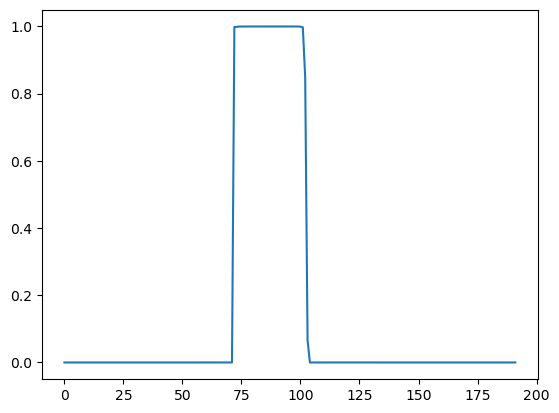

tmd prediction by DeepTMHMM


tmd ['M', 'M', 'V', 'G', 'A', 'A', 'T', 'L', 'C', 'S', 'A', 'L', 'Y', 'V', 'G', 'D', 'L', 'G', 'A', 'L', 'F', 'L', 'V', 'G', 'Q', 'G', 'F', 'A', 'W', 'D', 'M', 'M', 'M', 'N', 'W', 'S', 'P', 'A', 'M', 'T', 'L', 'I', 'V', 'M', 'F', 'D', 'L', 'V', 'I', 'G', 'A', 'H', 'W', 'G', 'V', 'M', 'A', 'G', 'V', 'A', 'Y', 'Y', 'S', 'M', 'A', 'K', 'V', 'F', 'L', 'V', 'L', 'C', 'L', 'F', 'S', 'G', 'V', 'D']
signal []
vfp predicted: 1
score vfp predicted: 0.998698592185974

 max score predicted

 top scores
    Unnamed: 0   entity     score  index word  start  end  class predicted  \
77          77  LABEL_1  0.999978     78    A    NaN  NaN                1   
81          81  LABEL_1  0.999977     82    S    NaN  NaN                1   
82          82  LABEL_1  0.999977     83    A    NaN  NaN                1   
90          90  LABEL_1  0.999969     91    G    NaN  NaN                1   
80          80  LABEL_1  0.999969     81    C    NaN  NaN                1   

    prob_class_0  prob_class_1  
77

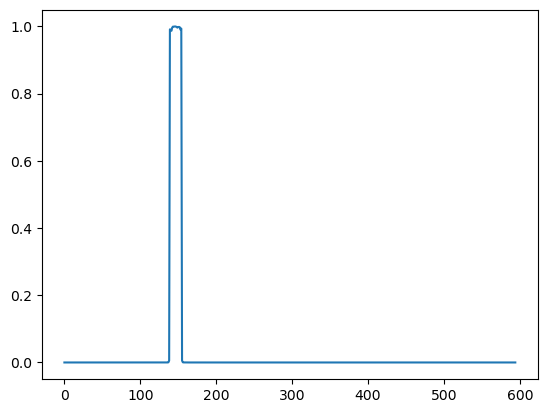

tmd prediction by DeepTMHMM


tmd ['W', 'Y', 'V', 'W', 'L', 'L', 'I', 'C', 'L', 'A', 'G', 'V', 'A', 'M', 'L', 'V', 'L', 'L', 'F', 'F', 'I']
signal []
vfp predicted: 0
score vfp predicted: 6.556510925292969e-06

 max score predicted

 top scores
     Unnamed: 0   entity     score  index word  start  end  class predicted  \
146         146  LABEL_1  0.999677    147    A    NaN  NaN                1   
145         145  LABEL_1  0.999573    146    S    NaN  NaN                1   
147         147  LABEL_1  0.999293    148    I    NaN  NaN                1   
143         143  LABEL_1  0.999165    144    S    NaN  NaN                1   
144         144  LABEL_1  0.999112    145    R    NaN  NaN                1   

     prob_class_0  prob_class_1  
146      0.000323      0.999677  
145      0.000427      0.999573  
147      0.000707      0.999293  
143      0.000835      0.999165  
144      0.000888      0.999112  
index of true 204
################################
225
Envelope glycoprotein gp160 (Env polyprotein) 
AVGM

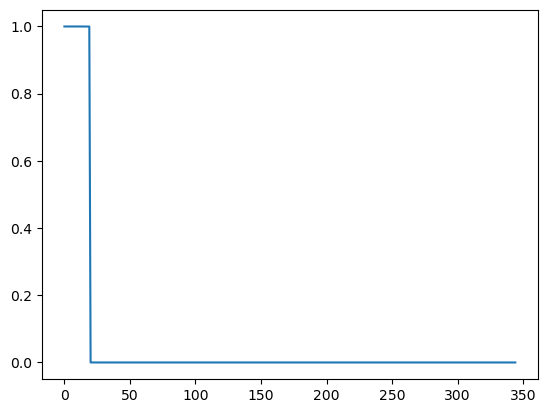

tmd prediction by DeepTMHMM


tmd ['I', 'F', 'I', 'M', 'I', 'V', 'G', 'G', 'L', 'I']
signal ['A', 'V', 'G', 'M', 'G', 'A', 'V', 'L', 'F', 'G']
vfp predicted: 1
score vfp predicted: 0.999936819076538

 max score predicted

 top scores
    Unnamed: 0   entity     score  index word  start  end  class predicted  \
10          10  LABEL_1  0.999983     11    F    NaN  NaN                1   
5            5  LABEL_1  0.999982      6    A    NaN  NaN                1   
3            3  LABEL_1  0.999981      4    M    NaN  NaN                1   
4            4  LABEL_1  0.999981      5    G    NaN  NaN                1   
12          12  LABEL_1  0.999979     13    G    NaN  NaN                1   

    prob_class_0  prob_class_1  
10      0.000017      0.999983  
5       0.000018      0.999982  
3       0.000019      0.999981  
4       0.000019      0.999981  
12      0.000021      0.999979  
index of true 0
################################
265
Envelope glycoprotein gp160 (Env polyprotein) 
AAGLGALFLGFLGDSREHMGA
vfp mod

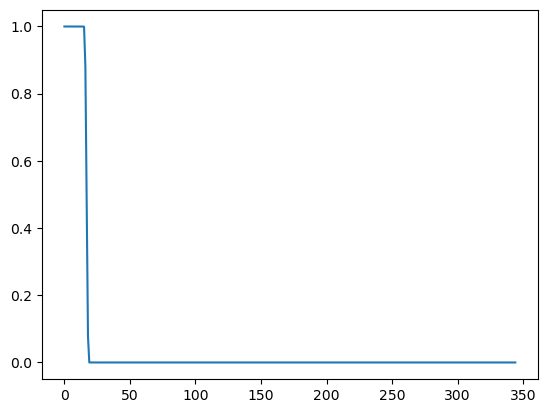

tmd prediction by DeepTMHMM


tmd ['I', 'K', 'I', 'F', 'I', 'M', 'I', 'V', 'G', 'G', 'L', 'I', 'G', 'L', 'R', 'I', 'V', 'F', 'A', 'V', 'L']
signal []
vfp predicted: 1
score vfp predicted: 0.9999279975891112

 max score predicted

 top scores
    Unnamed: 0   entity     score  index word  start  end  class predicted  \
4            4  LABEL_1  0.999981      5    G    NaN  NaN                1   
10          10  LABEL_1  0.999980     11    F    NaN  NaN                1   
6            6  LABEL_1  0.999978      7    L    NaN  NaN                1   
5            5  LABEL_1  0.999976      6    A    NaN  NaN                1   
11          11  LABEL_1  0.999974     12    L    NaN  NaN                1   

    prob_class_0  prob_class_1  
4       0.000019      0.999981  
10      0.000020      0.999980  
6       0.000022      0.999978  
5       0.000024      0.999976  
11      0.000026      0.999974  
index of true 0
################################
574
Pre-glycoprotein polyprotein GP complex
GTFTWTLSDSSGVENPGGYCLTKWMILA

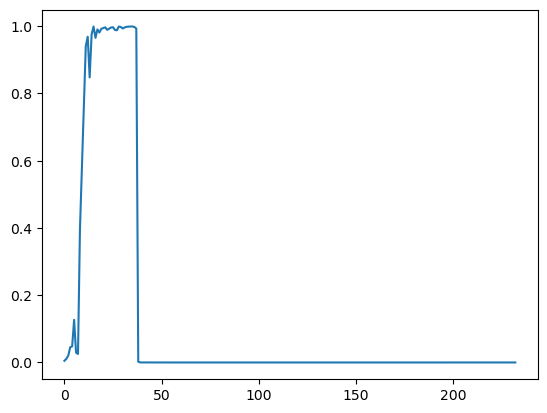

tmd prediction by DeepTMHMM


tmd ['L', 'M', 'D', 'L', 'L', 'M', 'F', 'S', 'T', 'S']
signal []
vfp predicted: 0
score vfp predicted: 0.005050778388977

 max score predicted

 top scores
    Unnamed: 0   entity     score  index word  start  end  class predicted  \
35          35  LABEL_1  0.999030     36    N    NaN  NaN                1   
15          15  LABEL_1  0.998871     16    P    NaN  NaN                1   
28          28  LABEL_1  0.998789     29    A    NaN  NaN                1   
34          34  LABEL_1  0.998763     35    G    NaN  NaN                1   
33          33  LABEL_1  0.998581     34    F    NaN  NaN                1   

    prob_class_0  prob_class_1  
35      0.000970      0.999030  
15      0.001129      0.998871  
28      0.001211      0.998789  
34      0.001237      0.998763  
33      0.001419      0.998581  
index of true 0
################################
618
fusion glycoprotein F0
FLGLILGLGAAVTAGVALAKT
vfp model prediction


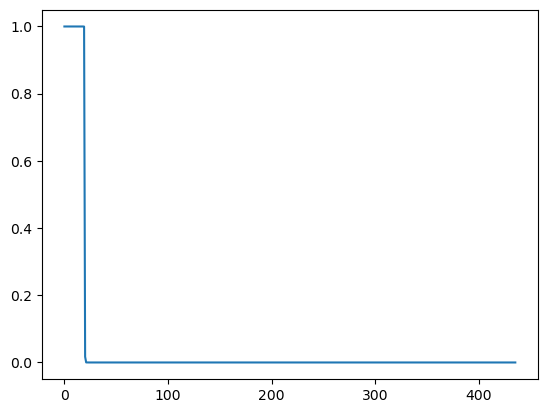

tmd prediction by DeepTMHMM


tmd ['L', 'L', 'F', 'V', 'V', 'M', 'L', 'I', 'I', 'I', 'M', 'A', 'V', 'I', 'G', 'F', 'I', 'L', 'Y']
signal []
vfp predicted: 1
score vfp predicted: 0.9999675750732422

 max score predicted

 top scores
    Unnamed: 0   entity     score  index word  start  end  class predicted  \
3            3  LABEL_1  0.999981      4    L    NaN  NaN                1   
4            4  LABEL_1  0.999980      5    I    NaN  NaN                1   
5            5  LABEL_1  0.999980      6    L    NaN  NaN                1   
2            2  LABEL_1  0.999977      3    G    NaN  NaN                1   
11          11  LABEL_1  0.999977     12    V    NaN  NaN                1   

    prob_class_0  prob_class_1  
3       0.000019      0.999981  
4       0.000020      0.999980  
5       0.000020      0.999980  
2       0.000023      0.999977  
11      0.000023      0.999977  
index of true 0
################################
779
G glycoprotein
[FRWYGPKY CGYATVT]
vfp model prediction


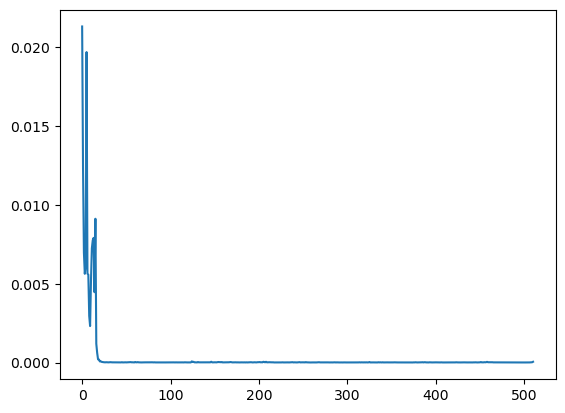

tmd prediction by DeepTMHMM


tmd ['F', 'F', 'F', 'I', 'I', 'G', 'L', 'I', 'I', 'G', 'L', 'F', 'L', 'V', 'L', 'R', 'V', 'G', 'I', 'Y', 'L']
signal ['M', 'K', 'C', 'L', 'L', 'Y', 'L', 'A', 'F', 'L', 'S', 'I', 'G', 'V', 'N', 'C']
vfp predicted: 0
score vfp predicted: 0.0213226079940795

 max score predicted

 top scores
    Unnamed: 0   entity     score  index word  start  end  class predicted  \
0            0  LABEL_0  0.978677      1    M    NaN  NaN                0   
5            5  LABEL_0  0.980302      6    Y    NaN  NaN                0   
1            1  LABEL_0  0.987619      2    K    NaN  NaN                0   
15          15  LABEL_0  0.990878     16    C    NaN  NaN                0   
13          13  LABEL_0  0.992091     14    V    NaN  NaN                0   

    prob_class_0  prob_class_1  
0       0.978677      0.021323  
5       0.980302      0.019698  
1       0.987619      0.012381  
15      0.990878      0.009122  
13      0.992091      0.007909  
index of true 0
###########################

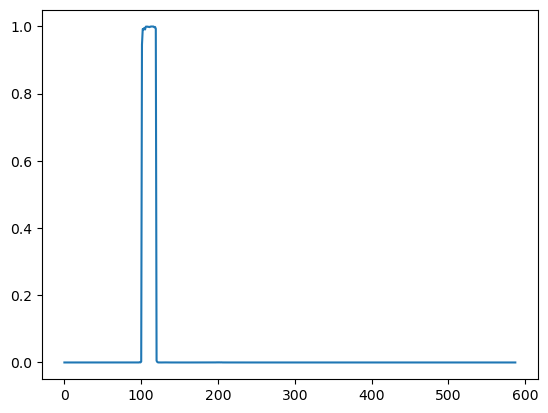

tmd prediction by DeepTMHMM


tmd ['W', 'Y', 'I', 'W', 'L', 'G', 'F', 'I', 'A', 'G', 'L', 'I', 'A', 'I', 'V', 'M', 'V', 'T', 'I', 'M', 'L']
signal []
vfp predicted: 0
score vfp predicted: 8.463859558105469e-06

 max score predicted

 top scores
     Unnamed: 0   entity     score  index word  start  end  class predicted  \
115         115  LABEL_1  0.999557    116    N    NaN  NaN                1   
113         113  LABEL_1  0.999491    114    G    NaN  NaN                1   
114         114  LABEL_1  0.999467    115    F    NaN  NaN                1   
116         116  LABEL_1  0.999398    117    F    NaN  NaN                1   
107         107  LABEL_1  0.999218    108    P    NaN  NaN                1   

     prob_class_0  prob_class_1  
115      0.000443      0.999557  
113      0.000509      0.999491  
114      0.000533      0.999467  
116      0.000602      0.999398  
107      0.000782      0.999218  
index of true 0


In [47]:
# T6 ESM2b
model_name_specific = '/seq_transformers_token_10KFOLD_cluster80_epoch30_T6'  # n faz diferença 

output(model_name_specific)


################################
105
Envelope glycoprotein
PISLTVALMLGGITVGGMARN
vfp model prediction


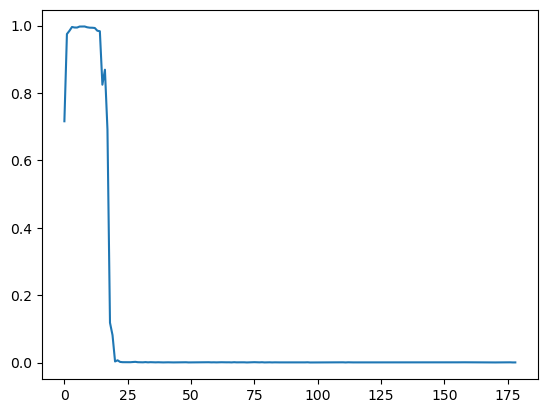

tmd prediction by DeepTMHMM


tmd ['L', 'M', 'I', 'L', 'L', 'L', 'I', 'L', 'L', 'F']
signal ['D', 'P', 'I', 'S', 'L', 'T', 'V', 'A', 'L', 'M']
vfp predicted: 1
score vfp predicted: 0.9746928215026855

 max score predicted

 top scores
   Unnamed: 0   entity     score  index word  start  end  class predicted  \
8           8  LABEL_1  0.997112      9    L    NaN  NaN                1   
7           7  LABEL_1  0.997070      8    A    NaN  NaN                1   
6           6  LABEL_1  0.996892      7    V    NaN  NaN                1   
3           3  LABEL_1  0.995623      4    S    NaN  NaN                1   
9           9  LABEL_1  0.994736     10    M    NaN  NaN                1   

   prob_class_0  prob_class_1  
8      0.002888      0.997112  
7      0.002930      0.997070  
6      0.003108      0.996892  
3      0.004376      0.995624  
9      0.005264      0.994736  
index of true 1
################################
146
Genome polyprotein
LVAPPTLCSALYVEDAFGAVSLVGQAFTFRPR
vfp model prediction


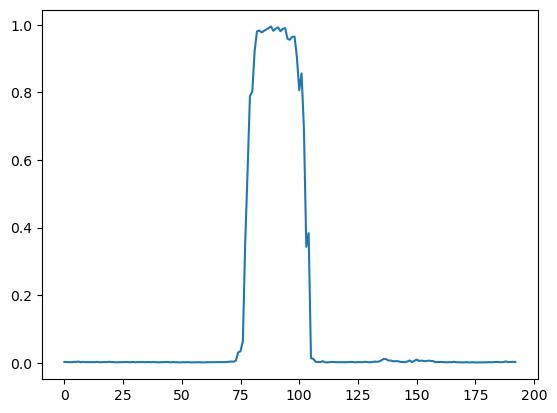

tmd prediction by DeepTMHMM


tmd ['M', 'M', 'M', 'N', 'W', 'S', 'P', 'A', 'I', 'G', 'L', 'V', 'I', 'T', 'F', 'F', 'D', 'L', 'V', 'V', 'G', 'A', 'H', 'W', 'G', 'V', 'M', 'A', 'G', 'L', 'A', 'Y', 'F', 'S', 'W', 'A', 'K', 'V', 'V', 'I', 'V', 'L', 'I', 'M', 'F', 'S', 'G', 'V', 'D']
signal []
vfp predicted: 0
score vfp predicted: 0.0305736660957336

 max score predicted

 top scores
    Unnamed: 0   entity     score  index word  start  end  class predicted  \
88          88  LABEL_1  0.995154     89    D    NaN  NaN                1   
91          91  LABEL_1  0.992511     92    G    NaN  NaN                1   
87          87  LABEL_1  0.990371     88    E    NaN  NaN                1   
94          94  LABEL_1  0.990357     95    S    NaN  NaN                1   
90          90  LABEL_1  0.988434     91    F    NaN  NaN                1   

    prob_class_0  prob_class_1  
88      0.004846      0.995154  
91      0.007489      0.992511  
87      0.009629      0.990371  
94      0.009643      0.990357  
90      0.0115

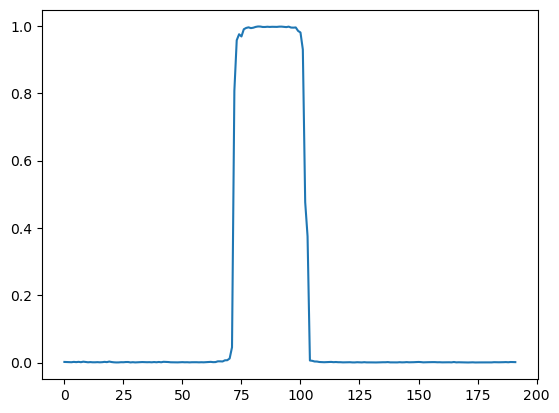

tmd prediction by DeepTMHMM


tmd ['M', 'M', 'V', 'G', 'A', 'A', 'T', 'L', 'C', 'S', 'A', 'L', 'Y', 'V', 'G', 'D', 'L', 'G', 'A', 'L', 'F', 'L', 'V', 'G', 'Q', 'G', 'F', 'A', 'W', 'D', 'M', 'M', 'M', 'N', 'W', 'S', 'P', 'A', 'M', 'T', 'L', 'I', 'V', 'M', 'F', 'D', 'L', 'V', 'I', 'G', 'A', 'H', 'W', 'G', 'V', 'M', 'A', 'G', 'V', 'A', 'Y', 'Y', 'S', 'M', 'A', 'K', 'V', 'F', 'L', 'V', 'L', 'C', 'L', 'F', 'S', 'G', 'V', 'D']
signal []
vfp predicted: 1
score vfp predicted: 0.957664430141449

 max score predicted

 top scores
    Unnamed: 0   entity     score  index word  start  end  class predicted  \
82          82  LABEL_1  0.998428     83    A    NaN  NaN                1   
83          83  LABEL_1  0.998249     84    L    NaN  NaN                1   
92          92  LABEL_1  0.997984     93    L    NaN  NaN                1   
95          95  LABEL_1  0.997943     96    V    NaN  NaN                1   
91          91  LABEL_1  0.997924     92    A    NaN  NaN                1   

    prob_class_0  prob_class_1  
82

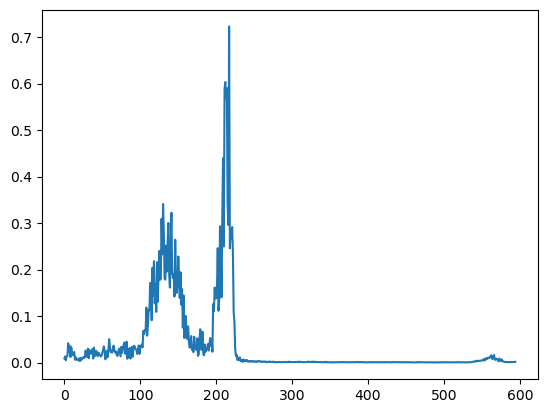

tmd prediction by DeepTMHMM


tmd ['W', 'Y', 'V', 'W', 'L', 'L', 'I', 'C', 'L', 'A', 'G', 'V', 'A', 'M', 'L', 'V', 'L', 'L', 'F', 'F', 'I']
signal []
vfp predicted: 0
score vfp predicted: 0.1369393467903137

 max score predicted

 top scores
     Unnamed: 0   entity     score  index word  start  end  class predicted  \
217         217  LABEL_1  0.722904    218    A    NaN  NaN                1   
212         212  LABEL_1  0.603526    213    F    NaN  NaN                1   
214         214  LABEL_1  0.590568    215    P    NaN  NaN                1   
211         211  LABEL_1  0.588939    212    L    NaN  NaN                1   
213         213  LABEL_1  0.568305    214    P    NaN  NaN                1   

     prob_class_0  prob_class_1  
217      0.277096      0.722904  
212      0.396474      0.603526  
214      0.409432      0.590568  
211      0.411061      0.588939  
213      0.431695      0.568305  
index of true 204
################################
225
Envelope glycoprotein gp160 (Env polyprotein) 
AVGMGAV

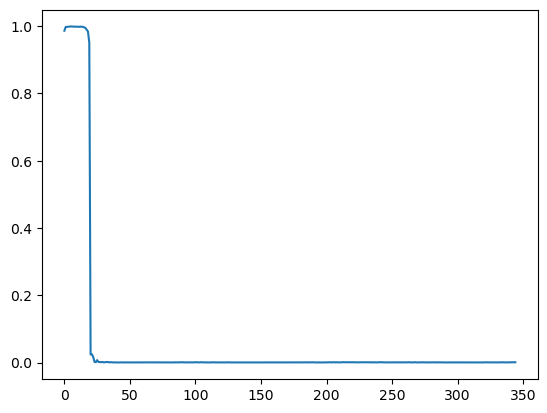

tmd prediction by DeepTMHMM


tmd ['I', 'F', 'I', 'M', 'I', 'V', 'G', 'G', 'L', 'I']
signal ['A', 'V', 'G', 'M', 'G', 'A', 'V', 'L', 'F', 'G']
vfp predicted: 1
score vfp predicted: 0.9865504503250122

 max score predicted

 top scores
   Unnamed: 0   entity     score  index word  start  end  class predicted  \
5           5  LABEL_1  0.999084      6    A    NaN  NaN                1   
6           6  LABEL_1  0.998910      7    V    NaN  NaN                1   
4           4  LABEL_1  0.998761      5    G    NaN  NaN                1   
7           7  LABEL_1  0.998708      8    L    NaN  NaN                1   
8           8  LABEL_1  0.998672      9    F    NaN  NaN                1   

   prob_class_0  prob_class_1  
5      0.000916      0.999084  
6      0.001090      0.998910  
4      0.001239      0.998761  
7      0.001292      0.998708  
8      0.001328      0.998672  
index of true 0
################################
265
Envelope glycoprotein gp160 (Env polyprotein) 
AAGLGALFLGFLGDSREHMGA
vfp model predicti

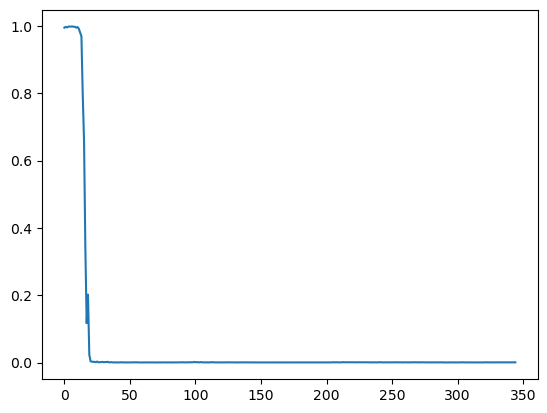

tmd prediction by DeepTMHMM


tmd ['I', 'K', 'I', 'F', 'I', 'M', 'I', 'V', 'G', 'G', 'L', 'I', 'G', 'L', 'R', 'I', 'V', 'F', 'A', 'V', 'L']
signal []
vfp predicted: 1
score vfp predicted: 0.994679868221283

 max score predicted

 top scores
   Unnamed: 0   entity     score  index word  start  end  class predicted  \
6           6  LABEL_1  0.998154      7    L    NaN  NaN                1   
4           4  LABEL_1  0.998017      5    G    NaN  NaN                1   
3           3  LABEL_1  0.997765      4    L    NaN  NaN                1   
5           5  LABEL_1  0.997687      6    A    NaN  NaN                1   
7           7  LABEL_1  0.997471      8    F    NaN  NaN                1   

   prob_class_0  prob_class_1  
6      0.001846      0.998154  
4      0.001983      0.998017  
3      0.002235      0.997765  
5      0.002313      0.997687  
7      0.002529      0.997471  
index of true 0
################################
574
Pre-glycoprotein polyprotein GP complex
GTFTWTLSDSSGVENPGGYCLTKWMILAAELKCFGNTAV
v

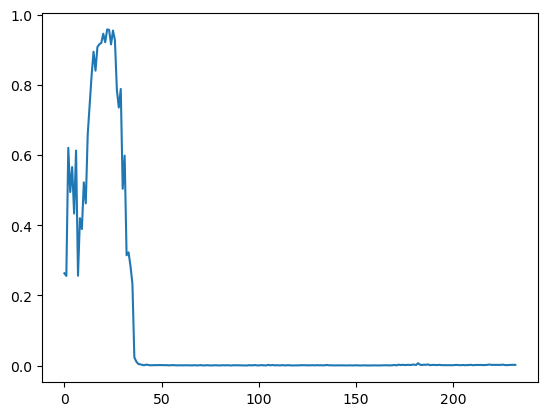

tmd prediction by DeepTMHMM


tmd ['L', 'M', 'D', 'L', 'L', 'M', 'F', 'S', 'T', 'S']
signal []
vfp predicted: 0
score vfp predicted: 0.2630298733711242

 max score predicted

 top scores
    Unnamed: 0   entity     score  index word  start  end  class predicted  \
22          22  LABEL_1  0.957670     23    K    NaN  NaN                1   
23          23  LABEL_1  0.956703     24    W    NaN  NaN                1   
25          25  LABEL_1  0.954601     26    I    NaN  NaN                1   
20          20  LABEL_1  0.945662     21    L    NaN  NaN                1   
26          26  LABEL_1  0.926965     27    L    NaN  NaN                1   

    prob_class_0  prob_class_1  
22      0.042330      0.957670  
23      0.043297      0.956703  
25      0.045399      0.954601  
20      0.054338      0.945662  
26      0.073035      0.926965  
index of true 0
################################
618
fusion glycoprotein F0
FLGLILGLGAAVTAGVALAKT
vfp model prediction


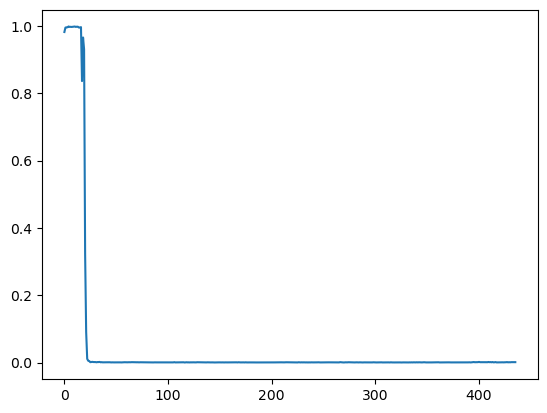

tmd prediction by DeepTMHMM


tmd ['L', 'L', 'F', 'V', 'V', 'M', 'L', 'I', 'I', 'I', 'M', 'A', 'V', 'I', 'G', 'F', 'I', 'L', 'Y']
signal []
vfp predicted: 1
score vfp predicted: 0.9817112684249878

 max score predicted

 top scores
    Unnamed: 0   entity     score  index word  start  end  class predicted  \
4            4  LABEL_1  0.998159      5    I    NaN  NaN                1   
10          10  LABEL_1  0.998014     11    A    NaN  NaN                1   
9            9  LABEL_1  0.997621     10    A    NaN  NaN                1   
12          12  LABEL_1  0.997507     13    T    NaN  NaN                1   
13          13  LABEL_1  0.997381     14    A    NaN  NaN                1   

    prob_class_0  prob_class_1  
4       0.001841      0.998159  
10      0.001986      0.998014  
9       0.002379      0.997621  
12      0.002493      0.997507  
13      0.002619      0.997381  
index of true 0
################################
779
G glycoprotein
[FRWYGPKY CGYATVT]
vfp model prediction


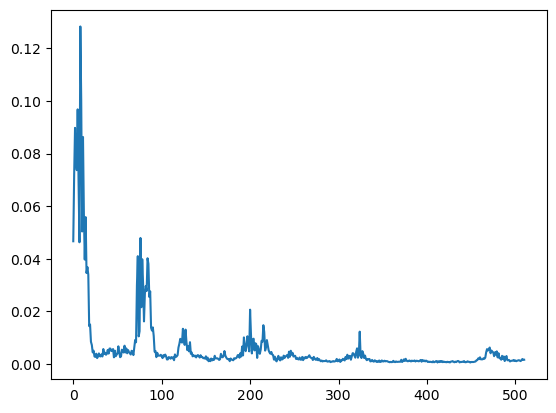

tmd prediction by DeepTMHMM


tmd ['F', 'F', 'F', 'I', 'I', 'G', 'L', 'I', 'I', 'G', 'L', 'F', 'L', 'V', 'L', 'R', 'V', 'G', 'I', 'Y', 'L']
signal ['M', 'K', 'C', 'L', 'L', 'Y', 'L', 'A', 'F', 'L', 'S', 'I', 'G', 'V', 'N', 'C']
vfp predicted: 0
score vfp predicted: 0.0466738939285278

 max score predicted

 top scores
    Unnamed: 0   entity     score  index word  start  end  class predicted  \
8            8  LABEL_0  0.871716      9    F    NaN  NaN                0   
9            9  LABEL_0  0.899906     10    L    NaN  NaN                0   
5            5  LABEL_0  0.903211      6    Y    NaN  NaN                0   
2            2  LABEL_0  0.910248      3    C    NaN  NaN                0   
11          11  LABEL_0  0.913710     12    I    NaN  NaN                0   

    prob_class_0  prob_class_1  
8       0.871716      0.128284  
9       0.899906      0.100094  
5       0.903211      0.096789  
2       0.910248      0.089752  
11      0.913710      0.086290  
index of true 0
###########################

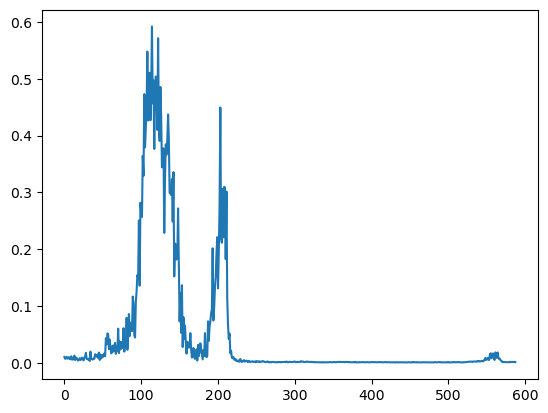

tmd prediction by DeepTMHMM


tmd ['W', 'Y', 'I', 'W', 'L', 'G', 'F', 'I', 'A', 'G', 'L', 'I', 'A', 'I', 'V', 'M', 'V', 'T', 'I', 'M', 'L']
signal []
vfp predicted: 0
score vfp predicted: 0.0101826786994934

 max score predicted

 top scores
     Unnamed: 0   entity     score  index word  start  end  class predicted  \
114         114  LABEL_1  0.591910    115    F    NaN  NaN                1   
122         122  LABEL_1  0.571296    123    D    NaN  NaN                1   
108         108  LABEL_1  0.547723    109    I    NaN  NaN                1   
111         111  LABEL_1  0.510410    112    F    NaN  NaN                1   
110         110  LABEL_1  0.508722    111    D    NaN  NaN                1   

     prob_class_0  prob_class_1  
114      0.408090      0.591910  
122      0.428704      0.571296  
108      0.452277      0.547723  
111      0.489590      0.510410  
110      0.491278      0.508722  
index of true 0


In [50]:
# # T12  batch1
model_name_specific = '/seq_transformers_token_10KFOLD_cluster80_epoch3_T12_try2'  #
output(model_name_specific)

################################
105
Envelope glycoprotein
PISLTVALMLGGITVGGMARN
vfp model prediction


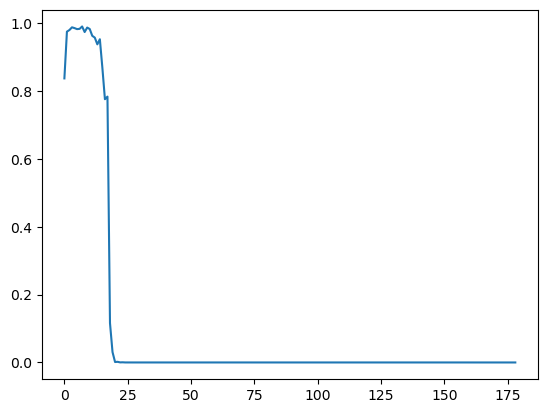

tmd prediction by DeepTMHMM


tmd ['L', 'M', 'I', 'L', 'L', 'L', 'I', 'L', 'L', 'F']
signal ['D', 'P', 'I', 'S', 'L', 'T', 'V', 'A', 'L', 'M']
vfp predicted: 1
score vfp predicted: 0.97564959526062

 max score predicted

 top scores
   Unnamed: 0   entity     score  index word  start  end  class predicted  \
7           7  LABEL_1  0.990931      8    A    NaN  NaN                1   
3           3  LABEL_1  0.988447      4    S    NaN  NaN                1   
9           9  LABEL_1  0.987718     10    M    NaN  NaN                1   
4           4  LABEL_1  0.986129      5    L    NaN  NaN                1   
6           6  LABEL_1  0.983912      7    V    NaN  NaN                1   

   prob_class_0  prob_class_1  
7      0.009069      0.990931  
3      0.011554      0.988446  
9      0.012282      0.987718  
4      0.013871      0.986129  
6      0.016088      0.983912  
index of true 1
################################
146
Genome polyprotein
LVAPPTLCSALYVEDAFGAVSLVGQAFTFRPR
vfp model prediction


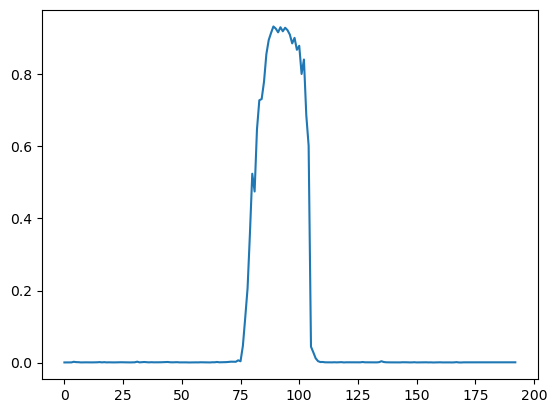

tmd prediction by DeepTMHMM


tmd ['M', 'M', 'M', 'N', 'W', 'S', 'P', 'A', 'I', 'G', 'L', 'V', 'I', 'T', 'F', 'F', 'D', 'L', 'V', 'V', 'G', 'A', 'H', 'W', 'G', 'V', 'M', 'A', 'G', 'L', 'A', 'Y', 'F', 'S', 'W', 'A', 'K', 'V', 'V', 'I', 'V', 'L', 'I', 'M', 'F', 'S', 'G', 'V', 'D']
signal []
vfp predicted: 0
score vfp predicted: 0.0061964988708496

 max score predicted

 top scores
    Unnamed: 0   entity     score  index word  start  end  class predicted  \
89          89  LABEL_1  0.933060     90    A    NaN  NaN                1   
92          92  LABEL_1  0.930955     93    A    NaN  NaN                1   
94          94  LABEL_1  0.929553     95    S    NaN  NaN                1   
90          90  LABEL_1  0.927148     91    F    NaN  NaN                1   
95          95  LABEL_1  0.922805     96    L    NaN  NaN                1   

    prob_class_0  prob_class_1  
89      0.066940      0.933060  
92      0.069045      0.930955  
94      0.070447      0.929553  
90      0.072852      0.927148  
95      0.0771

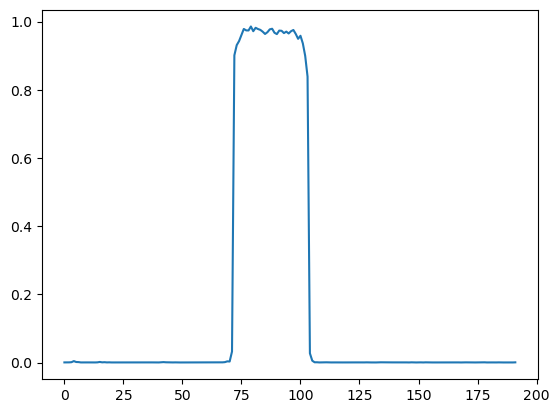

tmd prediction by DeepTMHMM


tmd ['M', 'M', 'V', 'G', 'A', 'A', 'T', 'L', 'C', 'S', 'A', 'L', 'Y', 'V', 'G', 'D', 'L', 'G', 'A', 'L', 'F', 'L', 'V', 'G', 'Q', 'G', 'F', 'A', 'W', 'D', 'M', 'M', 'M', 'N', 'W', 'S', 'P', 'A', 'M', 'T', 'L', 'I', 'V', 'M', 'F', 'D', 'L', 'V', 'I', 'G', 'A', 'H', 'W', 'G', 'V', 'M', 'A', 'G', 'V', 'A', 'Y', 'Y', 'S', 'M', 'A', 'K', 'V', 'F', 'L', 'V', 'L', 'C', 'L', 'F', 'S', 'G', 'V', 'D']
signal []
vfp predicted: 1
score vfp predicted: 0.930786907672882

 max score predicted

 top scores
    Unnamed: 0   entity     score  index word  start  end  class predicted  \
79          79  LABEL_1  0.985478     80    L    NaN  NaN                1   
81          81  LABEL_1  0.981632     82    S    NaN  NaN                1   
88          88  LABEL_1  0.978815     89    L    NaN  NaN                1   
76          76  LABEL_1  0.978237     77    A    NaN  NaN                1   
82          82  LABEL_1  0.978016     83    A    NaN  NaN                1   

    prob_class_0  prob_class_1  
79

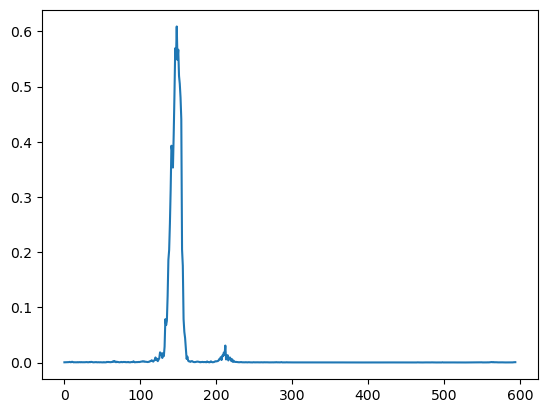

tmd prediction by DeepTMHMM


tmd ['W', 'Y', 'V', 'W', 'L', 'L', 'I', 'C', 'L', 'A', 'G', 'V', 'A', 'M', 'L', 'V', 'L', 'L', 'F', 'F', 'I']
signal []
vfp predicted: 0
score vfp predicted: 0.0061063170433044

 max score predicted

 top scores
     Unnamed: 0   entity     score  index word  start  end  class predicted  \
148         148  LABEL_1  0.609087    149    E    NaN  NaN                1   
146         146  LABEL_1  0.569617    147    A    NaN  NaN                1   
150         150  LABEL_1  0.566996    151    L    NaN  NaN                1   
147         147  LABEL_1  0.549999    148    I    NaN  NaN                1   
149         149  LABEL_1  0.548478    150    D    NaN  NaN                1   

     prob_class_0  prob_class_1  
148      0.390913      0.609087  
146      0.430383      0.569617  
150      0.433004      0.566996  
147      0.450001      0.549999  
149      0.451522      0.548478  
index of true 204
################################
225
Envelope glycoprotein gp160 (Env polyprotein) 
AVGMGAV

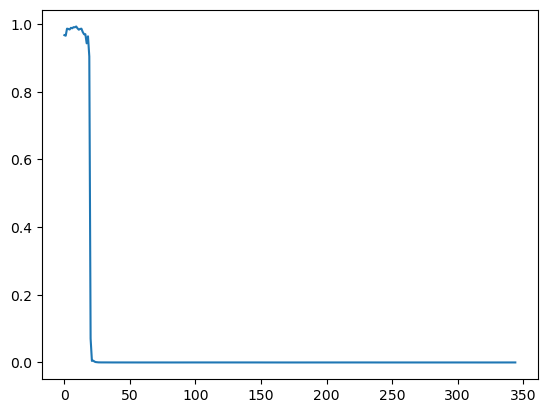

tmd prediction by DeepTMHMM


tmd ['I', 'F', 'I', 'M', 'I', 'V', 'G', 'G', 'L', 'I']
signal ['A', 'V', 'G', 'M', 'G', 'A', 'V', 'L', 'F', 'G']
vfp predicted: 1
score vfp predicted: 0.9671450257301332

 max score predicted

 top scores
   Unnamed: 0   entity     score  index word  start  end  class predicted  \
9           9  LABEL_1  0.992739     10    G    NaN  NaN                1   
7           7  LABEL_1  0.990750      8    L    NaN  NaN                1   
8           8  LABEL_1  0.990303      9    F    NaN  NaN                1   
5           5  LABEL_1  0.988669      6    A    NaN  NaN                1   
6           6  LABEL_1  0.987501      7    V    NaN  NaN                1   

   prob_class_0  prob_class_1  
9      0.007261      0.992739  
7      0.009250      0.990750  
8      0.009697      0.990303  
5      0.011331      0.988669  
6      0.012499      0.987501  
index of true 0
################################
265
Envelope glycoprotein gp160 (Env polyprotein) 
AAGLGALFLGFLGDSREHMGA
vfp model predicti

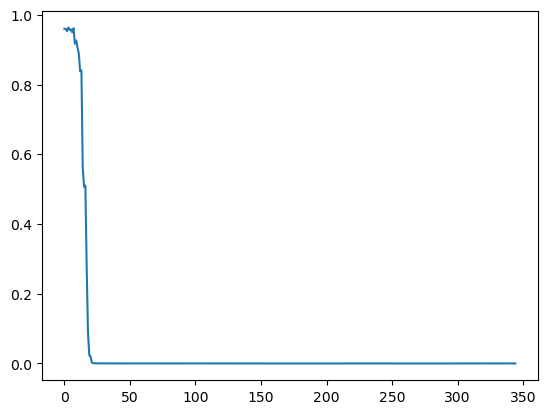

tmd prediction by DeepTMHMM


tmd ['I', 'K', 'I', 'F', 'I', 'M', 'I', 'V', 'G', 'G', 'L', 'I', 'G', 'L', 'R', 'I', 'V', 'F', 'A', 'V', 'L']
signal []
vfp predicted: 1
score vfp predicted: 0.960411787033081

 max score predicted

 top scores
   Unnamed: 0   entity     score  index word  start  end  class predicted  \
3           3  LABEL_1  0.963945      4    L    NaN  NaN                1   
7           7  LABEL_1  0.961763      8    F    NaN  NaN                1   
0           0  LABEL_1  0.960412      1    A    NaN  NaN                1   
1           1  LABEL_1  0.960006      2    A    NaN  NaN                1   
5           5  LABEL_1  0.958680      6    A    NaN  NaN                1   

   prob_class_0  prob_class_1  
3      0.036055      0.963945  
7      0.038236      0.961764  
0      0.039588      0.960412  
1      0.039994      0.960006  
5      0.041320      0.958680  
index of true 0
################################
574
Pre-glycoprotein polyprotein GP complex
GTFTWTLSDSSGVENPGGYCLTKWMILAAELKCFGNTAV
v

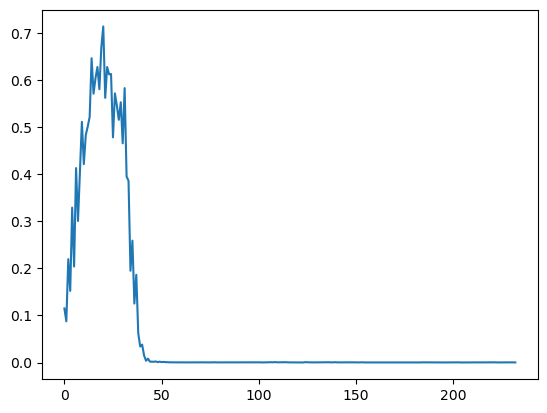

tmd prediction by DeepTMHMM


tmd ['L', 'M', 'D', 'L', 'L', 'M', 'F', 'S', 'T', 'S']
signal []
vfp predicted: 0
score vfp predicted: 0.1149922609329223

 max score predicted

 top scores
    Unnamed: 0   entity     score  index word  start  end  class predicted  \
20          20  LABEL_1  0.714381     21    L    NaN  NaN                1   
19          19  LABEL_1  0.669659     20    C    NaN  NaN                1   
14          14  LABEL_1  0.646849     15    N    NaN  NaN                1   
17          17  LABEL_1  0.628209     18    G    NaN  NaN                1   
22          22  LABEL_1  0.628178     23    K    NaN  NaN                1   

    prob_class_0  prob_class_1  
20      0.285619      0.714381  
19      0.330341      0.669659  
14      0.353151      0.646849  
17      0.371791      0.628209  
22      0.371822      0.628178  
index of true 0
################################
618
fusion glycoprotein F0
FLGLILGLGAAVTAGVALAKT
vfp model prediction


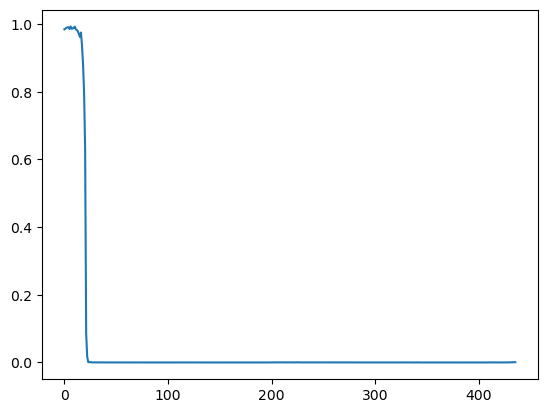

tmd prediction by DeepTMHMM


tmd ['L', 'L', 'F', 'V', 'V', 'M', 'L', 'I', 'I', 'I', 'M', 'A', 'V', 'I', 'G', 'F', 'I', 'L', 'Y']
signal []
vfp predicted: 1
score vfp predicted: 0.984548032283783

 max score predicted

 top scores
    Unnamed: 0   entity     score  index word  start  end  class predicted  \
6            6  LABEL_1  0.992950      7    G    NaN  NaN                1   
10          10  LABEL_1  0.992542     11    A    NaN  NaN                1   
4            4  LABEL_1  0.990766      5    I    NaN  NaN                1   
3            3  LABEL_1  0.990302      4    L    NaN  NaN                1   
9            9  LABEL_1  0.989422     10    A    NaN  NaN                1   

    prob_class_0  prob_class_1  
6       0.007051      0.992949  
10      0.007458      0.992542  
4       0.009234      0.990766  
3       0.009698      0.990302  
9       0.010578      0.989422  
index of true 0
################################
779
G glycoprotein
[FRWYGPKY CGYATVT]
vfp model prediction


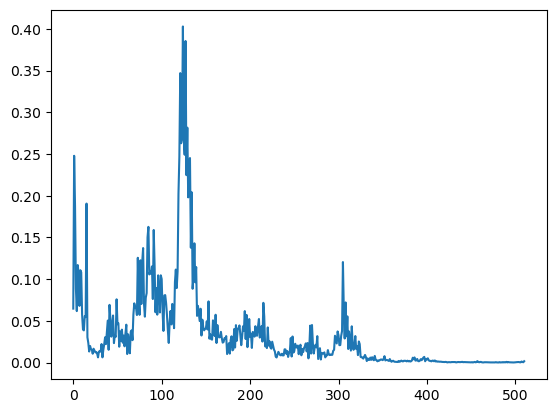

tmd prediction by DeepTMHMM


tmd ['F', 'F', 'F', 'I', 'I', 'G', 'L', 'I', 'I', 'G', 'L', 'F', 'L', 'V', 'L', 'R', 'V', 'G', 'I', 'Y', 'L']
signal ['M', 'K', 'C', 'L', 'L', 'Y', 'L', 'A', 'F', 'L', 'S', 'I', 'G', 'V', 'N', 'C']
vfp predicted: 0
score vfp predicted: 0.0647529959678649

 max score predicted

 top scores
     Unnamed: 0   entity     score  index word  start  end  class predicted  \
124         124  LABEL_0  0.597095    125    F    NaN  NaN                0   
127         127  LABEL_0  0.614481    128    Q    NaN  NaN                0   
121         121  LABEL_0  0.652992    122    N    NaN  NaN                0   
129         129  LABEL_0  0.718361    130    C    NaN  NaN                0   
123         123  LABEL_0  0.730621    124    G    NaN  NaN                0   

     prob_class_0  prob_class_1  
124      0.597095      0.402905  
127      0.614481      0.385519  
121      0.652992      0.347008  
129      0.718361      0.281639  
123      0.730621      0.269379  
index of true 0
###############

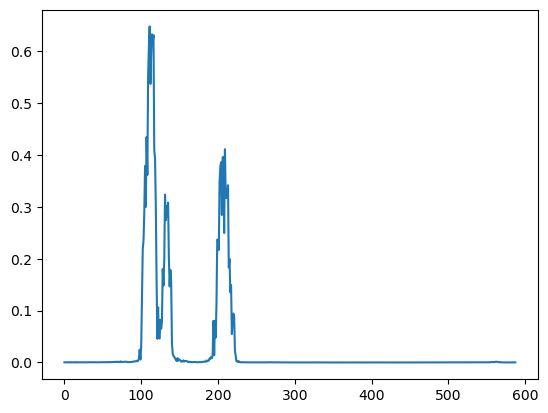

tmd prediction by DeepTMHMM


tmd ['W', 'Y', 'I', 'W', 'L', 'G', 'F', 'I', 'A', 'G', 'L', 'I', 'A', 'I', 'V', 'M', 'V', 'T', 'I', 'M', 'L']
signal []
vfp predicted: 0
score vfp predicted: 0.0003314018249511

 max score predicted

 top scores
     Unnamed: 0   entity     score  index word  start  end  class predicted  \
111         111  LABEL_1  0.648238    112    F    NaN  NaN                1   
114         114  LABEL_1  0.633029    115    F    NaN  NaN                1   
116         116  LABEL_1  0.631517    117    F    NaN  NaN                1   
115         115  LABEL_1  0.616471    116    N    NaN  NaN                1   
110         110  LABEL_1  0.609117    111    D    NaN  NaN                1   

     prob_class_0  prob_class_1  
111      0.351762      0.648238  
114      0.366971      0.633029  
116      0.368483      0.631517  
115      0.383529      0.616471  
110      0.390883      0.609117  
index of true 0


In [51]:
# # T12  batch1
model_name_specific = '/seq_transformers_token_10KFOLD_cluster80_epoch5_T12'  # ficam mais fracos os scores
output(model_name_specific)

################################
105
Envelope glycoprotein
PISLTVALMLGGITVGGMARN
vfp model prediction


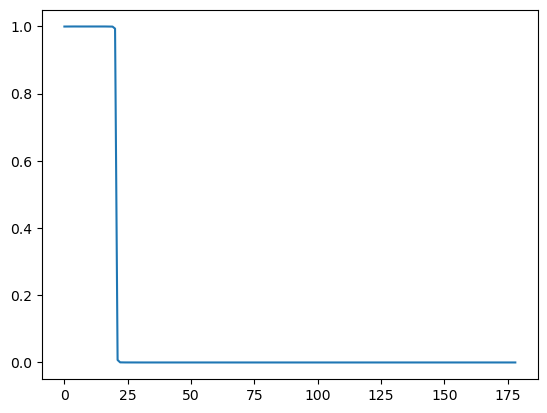

tmd prediction by DeepTMHMM


tmd ['L', 'M', 'I', 'L', 'L', 'L', 'I', 'L', 'L', 'F']
signal ['D', 'P', 'I', 'S', 'L', 'T', 'V', 'A', 'L', 'M']
vfp predicted: 1
score vfp predicted: 0.9998292922973632

 max score predicted

 top scores
    Unnamed: 0   entity     score  index word  start  end  class predicted  \
4            4  LABEL_1  0.999908      5    L    NaN  NaN                1   
3            3  LABEL_1  0.999904      4    S    NaN  NaN                1   
7            7  LABEL_1  0.999880      8    A    NaN  NaN                1   
16          16  LABEL_1  0.999876     17    G    NaN  NaN                1   
2            2  LABEL_1  0.999867      3    I    NaN  NaN                1   

    prob_class_0  prob_class_1  
4       0.000092      0.999908  
3       0.000096      0.999904  
7       0.000120      0.999880  
16      0.000124      0.999876  
2       0.000133      0.999867  
index of true 1
################################
146
Genome polyprotein
LVAPPTLCSALYVEDAFGAVSLVGQAFTFRPR
vfp model prediction


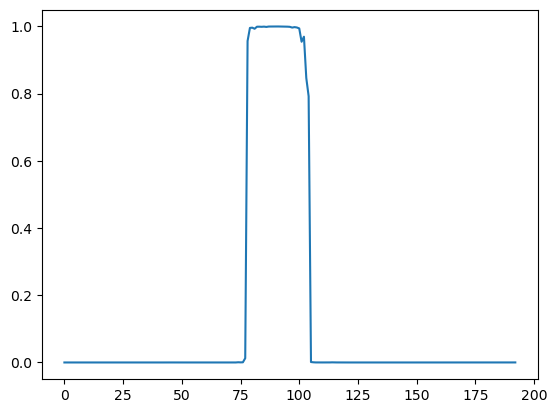

tmd prediction by DeepTMHMM


tmd ['M', 'M', 'M', 'N', 'W', 'S', 'P', 'A', 'I', 'G', 'L', 'V', 'I', 'T', 'F', 'F', 'D', 'L', 'V', 'V', 'G', 'A', 'H', 'W', 'G', 'V', 'M', 'A', 'G', 'L', 'A', 'Y', 'F', 'S', 'W', 'A', 'K', 'V', 'V', 'I', 'V', 'L', 'I', 'M', 'F', 'S', 'G', 'V', 'D']
signal []
vfp predicted: 0
score vfp predicted: 0.0006559491157531

 max score predicted

 top scores
    Unnamed: 0   entity     score  index word  start  end  class predicted  \
91          91  LABEL_1  0.999512     92    G    NaN  NaN                1   
89          89  LABEL_1  0.999487     90    A    NaN  NaN                1   
88          88  LABEL_1  0.999385     89    D    NaN  NaN                1   
92          92  LABEL_1  0.999373     93    A    NaN  NaN                1   
90          90  LABEL_1  0.999317     91    F    NaN  NaN                1   

    prob_class_0  prob_class_1  
91      0.000488      0.999512  
89      0.000513      0.999487  
88      0.000615      0.999385  
92      0.000627      0.999373  
90      0.0006

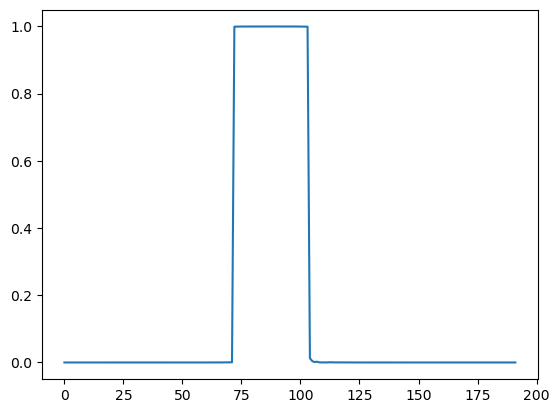

tmd prediction by DeepTMHMM


tmd ['M', 'M', 'V', 'G', 'A', 'A', 'T', 'L', 'C', 'S', 'A', 'L', 'Y', 'V', 'G', 'D', 'L', 'G', 'A', 'L', 'F', 'L', 'V', 'G', 'Q', 'G', 'F', 'A', 'W', 'D', 'M', 'M', 'M', 'N', 'W', 'S', 'P', 'A', 'M', 'T', 'L', 'I', 'V', 'M', 'F', 'D', 'L', 'V', 'I', 'G', 'A', 'H', 'W', 'G', 'V', 'M', 'A', 'G', 'V', 'A', 'Y', 'Y', 'S', 'M', 'A', 'K', 'V', 'F', 'L', 'V', 'L', 'C', 'L', 'F', 'S', 'G', 'V', 'D']
signal []
vfp predicted: 1
score vfp predicted: 0.9995148181915284

 max score predicted

 top scores
    Unnamed: 0   entity     score  index word  start  end  class predicted  \
91          91  LABEL_1  0.999907     92    A    NaN  NaN                1   
80          80  LABEL_1  0.999894     81    C    NaN  NaN                1   
90          90  LABEL_1  0.999892     91    G    NaN  NaN                1   
95          95  LABEL_1  0.999888     96    V    NaN  NaN                1   
88          88  LABEL_1  0.999886     89    L    NaN  NaN                1   

    prob_class_0  prob_class_1  
9

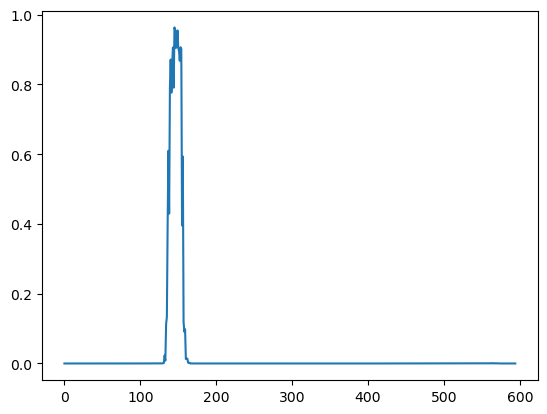

tmd prediction by DeepTMHMM


tmd ['W', 'Y', 'V', 'W', 'L', 'L', 'I', 'C', 'L', 'A', 'G', 'V', 'A', 'M', 'L', 'V', 'L', 'L', 'F', 'F', 'I']
signal []
vfp predicted: 0
score vfp predicted: 4.374980926513672e-05

 max score predicted

 top scores
     Unnamed: 0   entity     score  index word  start  end  class predicted  \
145         145  LABEL_1  0.962828    146    S    NaN  NaN                1   
149         149  LABEL_1  0.954369    150    D    NaN  NaN                1   
146         146  LABEL_1  0.953533    147    A    NaN  NaN                1   
148         148  LABEL_1  0.912598    149    E    NaN  NaN                1   
153         153  LABEL_1  0.906215    154    D    NaN  NaN                1   

     prob_class_0  prob_class_1  
145      0.037172      0.962828  
149      0.045631      0.954369  
146      0.046467      0.953533  
148      0.087402      0.912598  
153      0.093785      0.906215  
index of true 204
################################
225
Envelope glycoprotein gp160 (Env polyprotein) 
AVGM

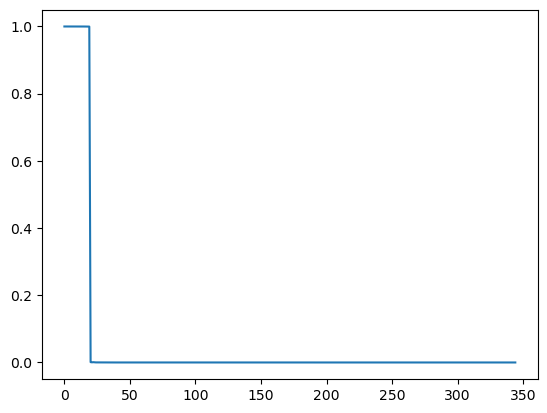

tmd prediction by DeepTMHMM


tmd ['I', 'F', 'I', 'M', 'I', 'V', 'G', 'G', 'L', 'I']
signal ['A', 'V', 'G', 'M', 'G', 'A', 'V', 'L', 'F', 'G']
vfp predicted: 1
score vfp predicted: 0.9999229907989502

 max score predicted

 top scores
   Unnamed: 0   entity     score  index word  start  end  class predicted  \
1           1  LABEL_1  0.999936      2    V    NaN  NaN                1   
0           0  LABEL_1  0.999923      1    A    NaN  NaN                1   
2           2  LABEL_1  0.999920      3    G    NaN  NaN                1   
4           4  LABEL_1  0.999908      5    G    NaN  NaN                1   
6           6  LABEL_1  0.999903      7    V    NaN  NaN                1   

   prob_class_0  prob_class_1  
1      0.000064      0.999936  
0      0.000077      0.999923  
2      0.000080      0.999920  
4      0.000092      0.999908  
6      0.000097      0.999903  
index of true 0
################################
265
Envelope glycoprotein gp160 (Env polyprotein) 
AAGLGALFLGFLGDSREHMGA
vfp model predicti

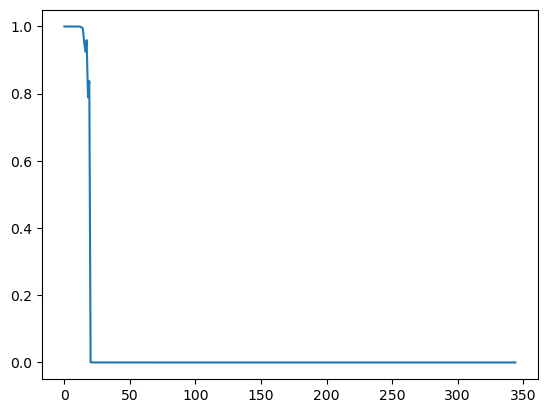

tmd prediction by DeepTMHMM


tmd ['I', 'K', 'I', 'F', 'I', 'M', 'I', 'V', 'G', 'G', 'L', 'I', 'G', 'L', 'R', 'I', 'V', 'F', 'A', 'V', 'L']
signal []
vfp predicted: 1
score vfp predicted: 0.999833345413208

 max score predicted

 top scores
   Unnamed: 0   entity     score  index word  start  end  class predicted  \
1           1  LABEL_1  0.999836      2    A    NaN  NaN                1   
0           0  LABEL_1  0.999833      1    A    NaN  NaN                1   
6           6  LABEL_1  0.999833      7    L    NaN  NaN                1   
5           5  LABEL_1  0.999833      6    A    NaN  NaN                1   
4           4  LABEL_1  0.999820      5    G    NaN  NaN                1   

   prob_class_0  prob_class_1  
1      0.000164      0.999836  
0      0.000167      0.999833  
6      0.000167      0.999833  
5      0.000167      0.999833  
4      0.000180      0.999820  
index of true 0
################################
574
Pre-glycoprotein polyprotein GP complex
GTFTWTLSDSSGVENPGGYCLTKWMILAAELKCFGNTAV
v

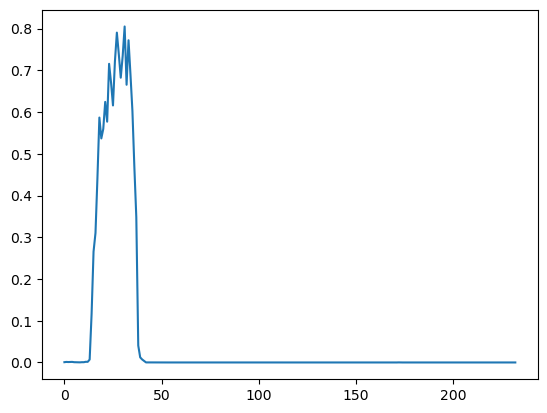

tmd prediction by DeepTMHMM


tmd ['L', 'M', 'D', 'L', 'L', 'M', 'F', 'S', 'T', 'S']
signal []
vfp predicted: 0
score vfp predicted: 0.0007215142250061

 max score predicted

 top scores
    Unnamed: 0   entity     score  index word  start  end  class predicted  \
31          31  LABEL_1  0.805146     32    K    NaN  NaN                1   
27          27  LABEL_1  0.790440     28    A    NaN  NaN                1   
33          33  LABEL_1  0.772136     34    F    NaN  NaN                1   
28          28  LABEL_1  0.738520     29    A    NaN  NaN                1   
30          30  LABEL_1  0.734744     31    L    NaN  NaN                1   

    prob_class_0  prob_class_1  
31      0.194854      0.805146  
27      0.209560      0.790440  
33      0.227864      0.772136  
28      0.261480      0.738520  
30      0.265256      0.734744  
index of true 0
################################
618
fusion glycoprotein F0
FLGLILGLGAAVTAGVALAKT
vfp model prediction


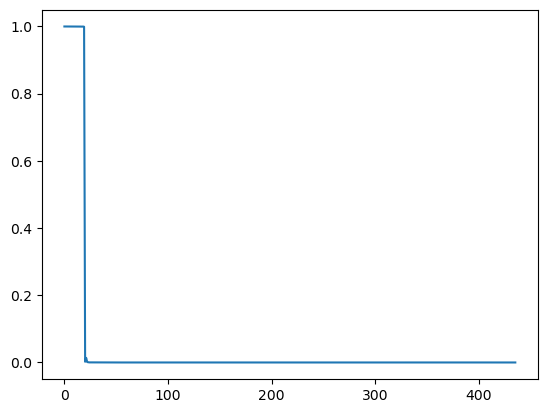

tmd prediction by DeepTMHMM


tmd ['L', 'L', 'F', 'V', 'V', 'M', 'L', 'I', 'I', 'I', 'M', 'A', 'V', 'I', 'G', 'F', 'I', 'L', 'Y']
signal []
vfp predicted: 1
score vfp predicted: 0.9998857975006104

 max score predicted

 top scores
    Unnamed: 0   entity     score  index word  start  end  class predicted  \
3            3  LABEL_1  0.999893      4    L    NaN  NaN                1   
2            2  LABEL_1  0.999891      3    G    NaN  NaN                1   
0            0  LABEL_1  0.999886      1    F    NaN  NaN                1   
1            1  LABEL_1  0.999884      2    L    NaN  NaN                1   
13          13  LABEL_1  0.999865     14    A    NaN  NaN                1   

    prob_class_0  prob_class_1  
3       0.000107      0.999893  
2       0.000109      0.999891  
0       0.000114      0.999886  
1       0.000116      0.999884  
13      0.000135      0.999865  
index of true 0
################################
779
G glycoprotein
[FRWYGPKY CGYATVT]
vfp model prediction


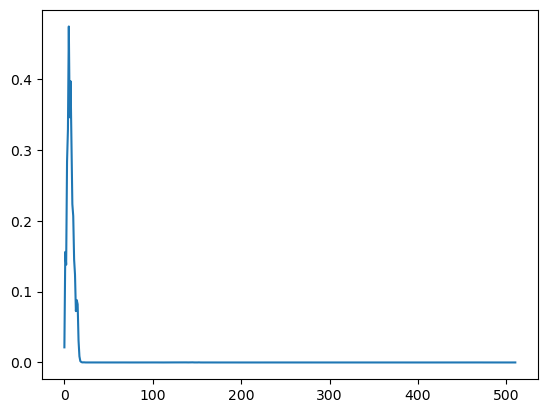

tmd prediction by DeepTMHMM


tmd ['F', 'F', 'F', 'I', 'I', 'G', 'L', 'I', 'I', 'G', 'L', 'F', 'L', 'V', 'L', 'R', 'V', 'G', 'I', 'Y', 'L']
signal ['M', 'K', 'C', 'L', 'L', 'Y', 'L', 'A', 'F', 'L', 'S', 'I', 'G', 'V', 'N', 'C']
vfp predicted: 0
score vfp predicted: 0.021341323852539

 max score predicted

 top scores
   Unnamed: 0   entity     score  index word  start  end  class predicted  \
5           5  LABEL_0  0.525833      6    Y    NaN  NaN                0   
7           7  LABEL_0  0.603044      8    A    NaN  NaN                0   
6           6  LABEL_0  0.653999      7    L    NaN  NaN                0   
4           4  LABEL_0  0.671350      5    L    NaN  NaN                0   
8           8  LABEL_0  0.685118      9    F    NaN  NaN                0   

   prob_class_0  prob_class_1  
5      0.525833      0.474167  
7      0.603044      0.396956  
6      0.653999      0.346001  
4      0.671350      0.328650  
8      0.685118      0.314882  
index of true 0
################################
804
Spi

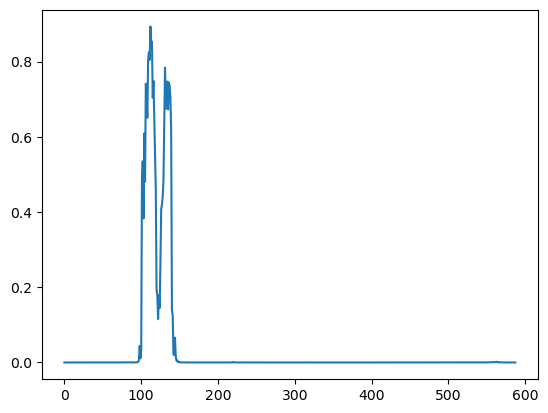

tmd prediction by DeepTMHMM


tmd ['W', 'Y', 'I', 'W', 'L', 'G', 'F', 'I', 'A', 'G', 'L', 'I', 'A', 'I', 'V', 'M', 'V', 'T', 'I', 'M', 'L']
signal []
vfp predicted: 0
score vfp predicted: 2.193450927734375e-05

 max score predicted

 top scores
     Unnamed: 0   entity     score  index word  start  end  class predicted  \
112         112  LABEL_1  0.893389    113    G    NaN  NaN                1   
114         114  LABEL_1  0.853478    115    F    NaN  NaN                1   
113         113  LABEL_1  0.839754    114    G    NaN  NaN                1   
110         110  LABEL_1  0.824578    111    D    NaN  NaN                1   
109         109  LABEL_1  0.806019    110    K    NaN  NaN                1   

     prob_class_0  prob_class_1  
112      0.106611      0.893389  
114      0.146523      0.853477  
113      0.160246      0.839754  
110      0.175422      0.824578  
109      0.193981      0.806019  
index of true 0


In [52]:
# # T12  batch1
model_name_specific = '/seq_transformers_token_10KFOLD_cluster80_epoch10_T12'  # 
output(model_name_specific)

################################
105
Envelope glycoprotein
PISLTVALMLGGITVGGMARN
vfp model prediction


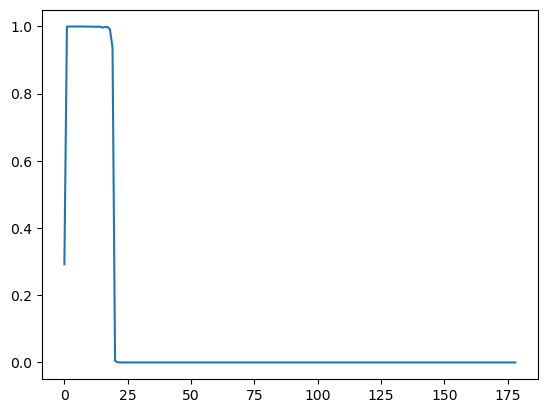

tmd prediction by DeepTMHMM


tmd ['L', 'M', 'I', 'L', 'L', 'L', 'I', 'L', 'L', 'F']
signal ['D', 'P', 'I', 'S', 'L', 'T', 'V', 'A', 'L', 'M']
vfp predicted: 1
score vfp predicted: 0.999647855758667

 max score predicted

 top scores
   Unnamed: 0   entity     score  index word  start  end  class predicted  \
7           7  LABEL_1  0.999896      8    A    NaN  NaN                1   
6           6  LABEL_1  0.999879      7    V    NaN  NaN                1   
4           4  LABEL_1  0.999878      5    L    NaN  NaN                1   
3           3  LABEL_1  0.999874      4    S    NaN  NaN                1   
5           5  LABEL_1  0.999844      6    T    NaN  NaN                1   

   prob_class_0  prob_class_1  
7      0.000104      0.999896  
6      0.000121      0.999879  
4      0.000122      0.999878  
3      0.000126      0.999874  
5      0.000156      0.999844  
index of true 1
################################
146
Genome polyprotein
LVAPPTLCSALYVEDAFGAVSLVGQAFTFRPR
vfp model prediction


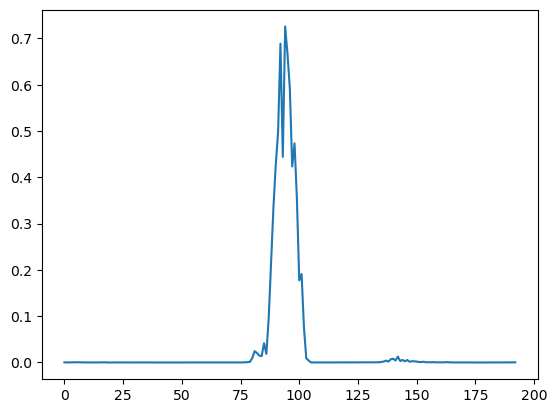

tmd prediction by DeepTMHMM


tmd ['M', 'M', 'M', 'N', 'W', 'S', 'P', 'A', 'I', 'G', 'L', 'V', 'I', 'T', 'F', 'F', 'D', 'L', 'V', 'V', 'G', 'A', 'H', 'W', 'G', 'V', 'M', 'A', 'G', 'L', 'A', 'Y', 'F', 'S', 'W', 'A', 'K', 'V', 'V', 'I', 'V', 'L', 'I', 'M', 'F', 'S', 'G', 'V', 'D']
signal []
vfp predicted: 0
score vfp predicted: 0.0001969933509826

 max score predicted

 top scores
    Unnamed: 0   entity     score  index word  start  end  class predicted  \
94          94  LABEL_1  0.725723     95    S    NaN  NaN                1   
92          92  LABEL_1  0.688622     93    A    NaN  NaN                1   
95          95  LABEL_1  0.666430     96    L    NaN  NaN                1   
96          96  LABEL_1  0.591317     97    V    NaN  NaN                1   
91          91  LABEL_0  0.501748     92    G    NaN  NaN                0   

    prob_class_0  prob_class_1  
94      0.274277      0.725723  
92      0.311378      0.688622  
95      0.333570      0.666430  
96      0.408683      0.591317  
91      0.5017

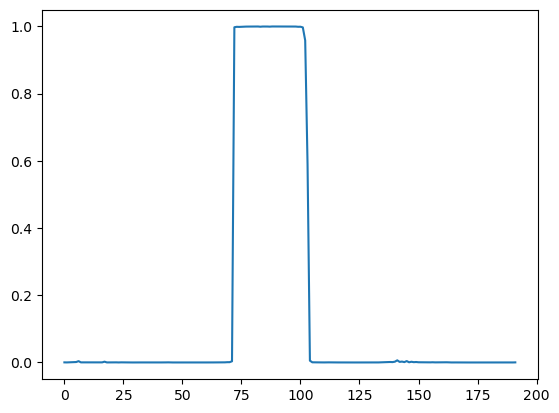

tmd prediction by DeepTMHMM


tmd ['M', 'M', 'V', 'G', 'A', 'A', 'T', 'L', 'C', 'S', 'A', 'L', 'Y', 'V', 'G', 'D', 'L', 'G', 'A', 'L', 'F', 'L', 'V', 'G', 'Q', 'G', 'F', 'A', 'W', 'D', 'M', 'M', 'M', 'N', 'W', 'S', 'P', 'A', 'M', 'T', 'L', 'I', 'V', 'M', 'F', 'D', 'L', 'V', 'I', 'G', 'A', 'H', 'W', 'G', 'V', 'M', 'A', 'G', 'V', 'A', 'Y', 'Y', 'S', 'M', 'A', 'K', 'V', 'F', 'L', 'V', 'L', 'C', 'L', 'F', 'S', 'G', 'V', 'D']
signal []
vfp predicted: 1
score vfp predicted: 0.9988532066345216

 max score predicted

 top scores
    Unnamed: 0   entity     score  index word  start  end  class predicted  \
88          88  LABEL_1  0.999825     89    L    NaN  NaN                1   
89          89  LABEL_1  0.999810     90    C    NaN  NaN                1   
85          85  LABEL_1  0.999801     86    V    NaN  NaN                1   
94          94  LABEL_1  0.999768     95    L    NaN  NaN                1   
82          82  LABEL_1  0.999749     83    A    NaN  NaN                1   

    prob_class_0  prob_class_1  
8

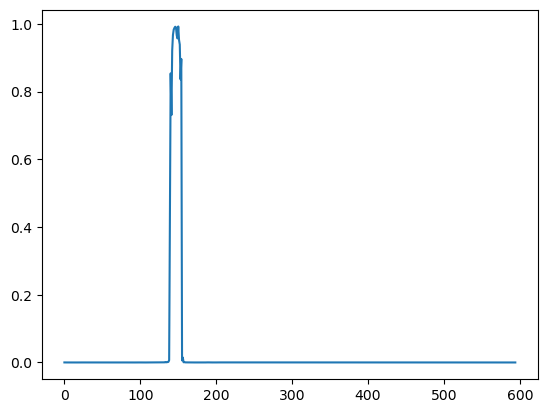

tmd prediction by DeepTMHMM


tmd ['W', 'Y', 'V', 'W', 'L', 'L', 'I', 'C', 'L', 'A', 'G', 'V', 'A', 'M', 'L', 'V', 'L', 'L', 'F', 'F', 'I']
signal []
vfp predicted: 0
score vfp predicted: 0.0001027584075927

 max score predicted

 top scores
     Unnamed: 0   entity     score  index word  start  end  class predicted  \
150         150  LABEL_1  0.992530    151    L    NaN  NaN                1   
146         146  LABEL_1  0.991796    147    A    NaN  NaN                1   
147         147  LABEL_1  0.989943    148    I    NaN  NaN                1   
145         145  LABEL_1  0.988394    146    S    NaN  NaN                1   
144         144  LABEL_1  0.983117    145    R    NaN  NaN                1   

     prob_class_0  prob_class_1  
150      0.007470      0.992530  
146      0.008204      0.991796  
147      0.010057      0.989943  
145      0.011606      0.988394  
144      0.016883      0.983117  
index of true 204
################################
225
Envelope glycoprotein gp160 (Env polyprotein) 
AVGMGAV

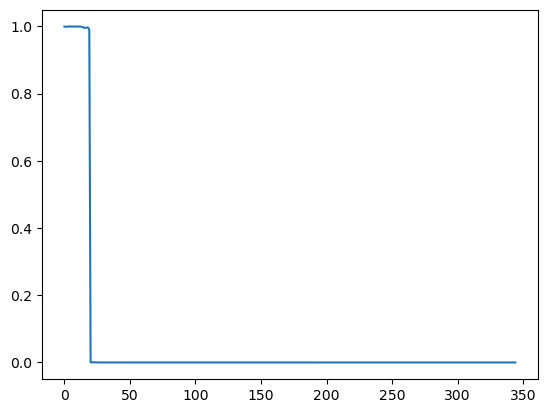

tmd prediction by DeepTMHMM


tmd ['I', 'F', 'I', 'M', 'I', 'V', 'G', 'G', 'L', 'I']
signal ['A', 'V', 'G', 'M', 'G', 'A', 'V', 'L', 'F', 'G']
vfp predicted: 1
score vfp predicted: 0.9996774196624756

 max score predicted

 top scores
    Unnamed: 0   entity     score  index word  start  end  class predicted  \
6            6  LABEL_1  0.999920      7    V    NaN  NaN                1   
7            7  LABEL_1  0.999906      8    L    NaN  NaN                1   
5            5  LABEL_1  0.999878      6    A    NaN  NaN                1   
3            3  LABEL_1  0.999873      4    M    NaN  NaN                1   
11          11  LABEL_1  0.999872     12    L    NaN  NaN                1   

    prob_class_0  prob_class_1  
6       0.000080      0.999920  
7       0.000094      0.999906  
5       0.000122      0.999878  
3       0.000127      0.999873  
11      0.000128      0.999872  
index of true 0
################################
265
Envelope glycoprotein gp160 (Env polyprotein) 
AAGLGALFLGFLGDSREHMGA
vfp mo

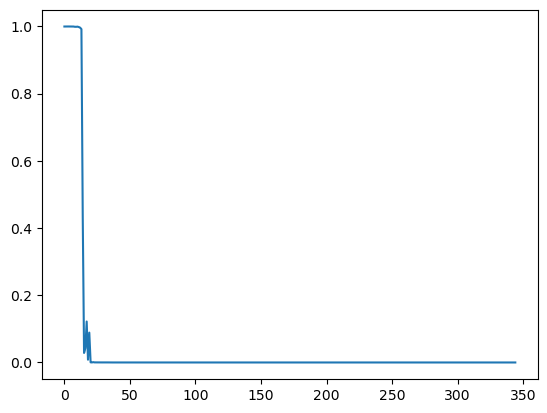

tmd prediction by DeepTMHMM


tmd ['I', 'K', 'I', 'F', 'I', 'M', 'I', 'V', 'G', 'G', 'L', 'I', 'G', 'L', 'R', 'I', 'V', 'F', 'A', 'V', 'L']
signal []
vfp predicted: 1
score vfp predicted: 0.9997571110725404

 max score predicted

 top scores
   Unnamed: 0   entity     score  index word  start  end  class predicted  \
6           6  LABEL_1  0.999880      7    L    NaN  NaN                1   
1           1  LABEL_1  0.999876      2    A    NaN  NaN                1   
3           3  LABEL_1  0.999864      4    L    NaN  NaN                1   
5           5  LABEL_1  0.999861      6    A    NaN  NaN                1   
2           2  LABEL_1  0.999825      3    G    NaN  NaN                1   

   prob_class_0  prob_class_1  
6      0.000120      0.999880  
1      0.000124      0.999876  
3      0.000136      0.999864  
5      0.000139      0.999861  
2      0.000175      0.999825  
index of true 0
################################
574
Pre-glycoprotein polyprotein GP complex
GTFTWTLSDSSGVENPGGYCLTKWMILAAELKCFGNTAV


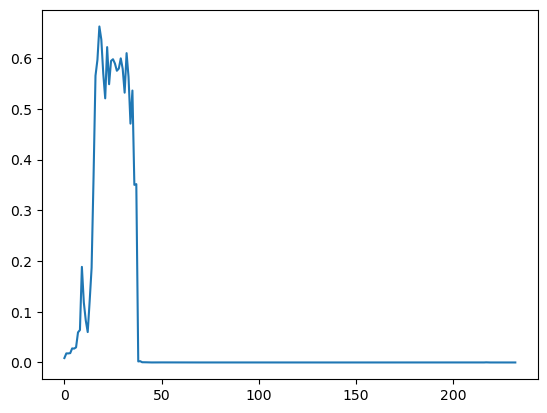

tmd prediction by DeepTMHMM


tmd ['L', 'M', 'D', 'L', 'L', 'M', 'F', 'S', 'T', 'S']
signal []
vfp predicted: 0
score vfp predicted: 0.0087436437606811

 max score predicted

 top scores
    Unnamed: 0   entity     score  index word  start  end  class predicted  \
18          18  LABEL_1  0.662704     19    Y    NaN  NaN                1   
19          19  LABEL_1  0.636982     20    C    NaN  NaN                1   
22          22  LABEL_1  0.622010     23    K    NaN  NaN                1   
32          32  LABEL_1  0.610119     33    C    NaN  NaN                1   
29          29  LABEL_1  0.599878     30    E    NaN  NaN                1   

    prob_class_0  prob_class_1  
18      0.337296      0.662704  
19      0.363018      0.636982  
22      0.377990      0.622010  
32      0.389881      0.610119  
29      0.400122      0.599878  
index of true 0
################################
618
fusion glycoprotein F0
FLGLILGLGAAVTAGVALAKT
vfp model prediction


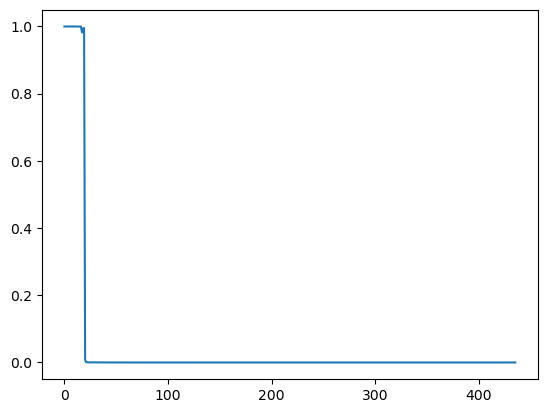

tmd prediction by DeepTMHMM


tmd ['L', 'L', 'F', 'V', 'V', 'M', 'L', 'I', 'I', 'I', 'M', 'A', 'V', 'I', 'G', 'F', 'I', 'L', 'Y']
signal []
vfp predicted: 1
score vfp predicted: 0.9997828602790833

 max score predicted

 top scores
   Unnamed: 0   entity     score  index word  start  end  class predicted  \
3           3  LABEL_1  0.999925      4    L    NaN  NaN                1   
4           4  LABEL_1  0.999912      5    I    NaN  NaN                1   
5           5  LABEL_1  0.999912      6    L    NaN  NaN                1   
7           7  LABEL_1  0.999912      8    L    NaN  NaN                1   
9           9  LABEL_1  0.999897     10    A    NaN  NaN                1   

   prob_class_0  prob_class_1  
3      0.000075      0.999925  
4      0.000088      0.999912  
5      0.000088      0.999912  
7      0.000088      0.999912  
9      0.000103      0.999897  
index of true 0
################################
779
G glycoprotein
[FRWYGPKY CGYATVT]
vfp model prediction


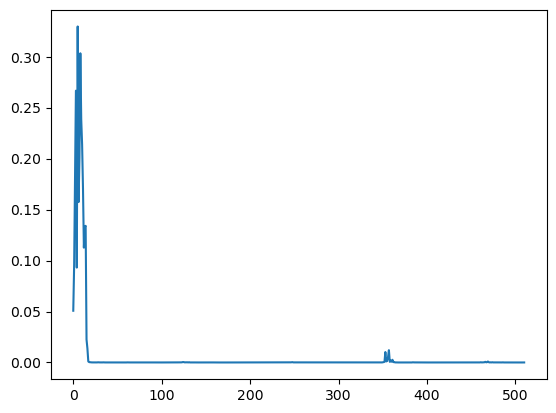

tmd prediction by DeepTMHMM


tmd ['F', 'F', 'F', 'I', 'I', 'G', 'L', 'I', 'I', 'G', 'L', 'F', 'L', 'V', 'L', 'R', 'V', 'G', 'I', 'Y', 'L']
signal ['M', 'K', 'C', 'L', 'L', 'Y', 'L', 'A', 'F', 'L', 'S', 'I', 'G', 'V', 'N', 'C']
vfp predicted: 0
score vfp predicted: 0.0507571697235107

 max score predicted

 top scores
    Unnamed: 0   entity     score  index word  start  end  class predicted  \
5            5  LABEL_0  0.670367      6    Y    NaN  NaN                0   
8            8  LABEL_0  0.696675      9    F    NaN  NaN                0   
3            3  LABEL_0  0.733365      4    L    NaN  NaN                0   
9            9  LABEL_0  0.761351     10    L    NaN  NaN                0   
10          10  LABEL_0  0.786127     11    S    NaN  NaN                0   

    prob_class_0  prob_class_1  
5       0.670367      0.329633  
8       0.696675      0.303325  
3       0.733365      0.266635  
9       0.761351      0.238649  
10      0.786127      0.213873  
index of true 0
###########################

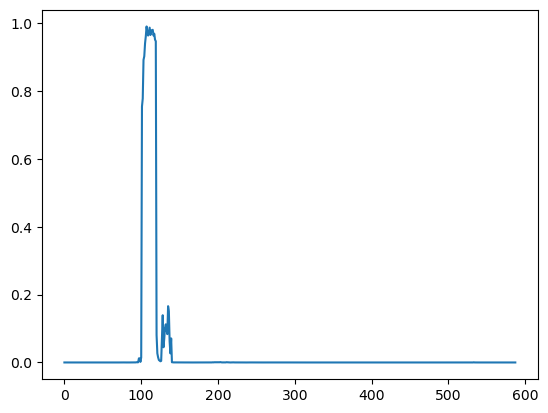

tmd prediction by DeepTMHMM


tmd ['W', 'Y', 'I', 'W', 'L', 'G', 'F', 'I', 'A', 'G', 'L', 'I', 'A', 'I', 'V', 'M', 'V', 'T', 'I', 'M', 'L']
signal []
vfp predicted: 0
score vfp predicted: 5.733966827392578e-05

 max score predicted

 top scores
     Unnamed: 0   entity     score  index word  start  end  class predicted  \
107         107  LABEL_1  0.990542    108    P    NaN  NaN                1   
111         111  LABEL_1  0.987095    112    F    NaN  NaN                1   
115         115  LABEL_1  0.980753    116    N    NaN  NaN                1   
114         114  LABEL_1  0.979772    115    F    NaN  NaN                1   
113         113  LABEL_1  0.978776    114    G    NaN  NaN                1   

     prob_class_0  prob_class_1  
107      0.009458      0.990542  
111      0.012905      0.987095  
115      0.019247      0.980753  
114      0.020228      0.979772  
113      0.021224      0.978776  
index of true 0


In [53]:
# # T12  batch1
model_name_specific = '/seq_transformers_token_10KFOLD_cluster80_epoch15_T12'  # parecido c os de cima 
output(model_name_specific)

################################
105
Envelope glycoprotein
PISLTVALMLGGITVGGMARN
vfp model prediction


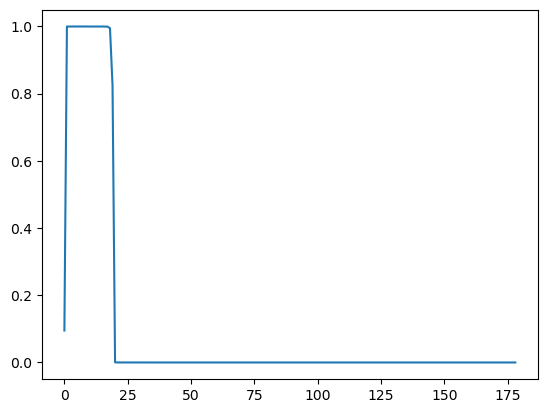

tmd prediction by DeepTMHMM


tmd ['L', 'M', 'I', 'L', 'L', 'L', 'I', 'L', 'L', 'F']
signal ['D', 'P', 'I', 'S', 'L', 'T', 'V', 'A', 'L', 'M']
vfp predicted: 1
score vfp predicted: 0.9998006224632264

 max score predicted

 top scores
    Unnamed: 0   entity     score  index word  start  end  class predicted  \
7            7  LABEL_1  0.999944      8    A    NaN  NaN                1   
14          14  LABEL_1  0.999936     15    T    NaN  NaN                1   
4            4  LABEL_1  0.999931      5    L    NaN  NaN                1   
5            5  LABEL_1  0.999923      6    T    NaN  NaN                1   
6            6  LABEL_1  0.999907      7    V    NaN  NaN                1   

    prob_class_0  prob_class_1  
7       0.000056      0.999944  
14      0.000064      0.999936  
4       0.000069      0.999931  
5       0.000077      0.999923  
6       0.000093      0.999907  
index of true 1
################################
146
Genome polyprotein
LVAPPTLCSALYVEDAFGAVSLVGQAFTFRPR
vfp model prediction


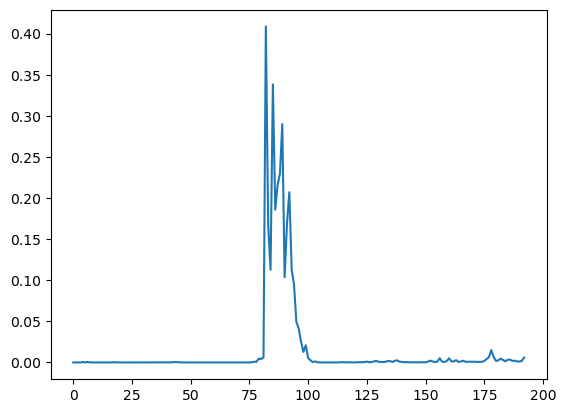

tmd prediction by DeepTMHMM


tmd ['M', 'M', 'M', 'N', 'W', 'S', 'P', 'A', 'I', 'G', 'L', 'V', 'I', 'T', 'F', 'F', 'D', 'L', 'V', 'V', 'G', 'A', 'H', 'W', 'G', 'V', 'M', 'A', 'G', 'L', 'A', 'Y', 'F', 'S', 'W', 'A', 'K', 'V', 'V', 'I', 'V', 'L', 'I', 'M', 'F', 'S', 'G', 'V', 'D']
signal []
vfp predicted: 0
score vfp predicted: 5.245208740234375e-05

 max score predicted

 top scores
    Unnamed: 0   entity     score  index word  start  end  class predicted  \
82          82  LABEL_0  0.591272     83    S    NaN  NaN                0   
85          85  LABEL_0  0.661765     86    Y    NaN  NaN                0   
89          89  LABEL_0  0.710118     90    A    NaN  NaN                0   
88          88  LABEL_0  0.770555     89    D    NaN  NaN                0   
87          87  LABEL_0  0.784446     88    E    NaN  NaN                0   

    prob_class_0  prob_class_1  
82      0.591272      0.408728  
85      0.661765      0.338235  
89      0.710118      0.289882  
88      0.770555      0.229445  
87      0.7

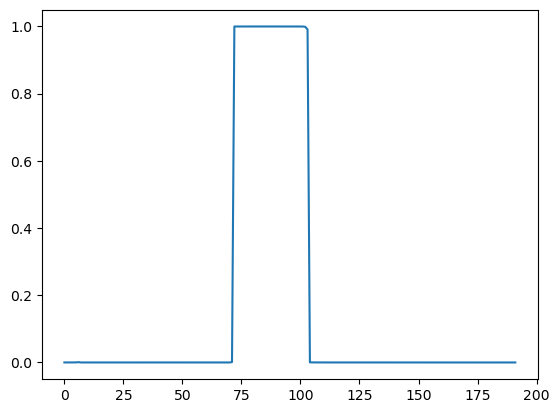

tmd prediction by DeepTMHMM


tmd ['M', 'M', 'V', 'G', 'A', 'A', 'T', 'L', 'C', 'S', 'A', 'L', 'Y', 'V', 'G', 'D', 'L', 'G', 'A', 'L', 'F', 'L', 'V', 'G', 'Q', 'G', 'F', 'A', 'W', 'D', 'M', 'M', 'M', 'N', 'W', 'S', 'P', 'A', 'M', 'T', 'L', 'I', 'V', 'M', 'F', 'D', 'L', 'V', 'I', 'G', 'A', 'H', 'W', 'G', 'V', 'M', 'A', 'G', 'V', 'A', 'Y', 'Y', 'S', 'M', 'A', 'K', 'V', 'F', 'L', 'V', 'L', 'C', 'L', 'F', 'S', 'G', 'V', 'D']
signal []
vfp predicted: 1
score vfp predicted: 0.9998331069946288

 max score predicted

 top scores
    Unnamed: 0   entity     score  index word  start  end  class predicted  \
82          82  LABEL_1  0.999927     83    A    NaN  NaN                1   
79          79  LABEL_1  0.999914     80    L    NaN  NaN                1   
81          81  LABEL_1  0.999913     82    S    NaN  NaN                1   
88          88  LABEL_1  0.999909     89    L    NaN  NaN                1   
90          90  LABEL_1  0.999908     91    G    NaN  NaN                1   

    prob_class_0  prob_class_1  
8

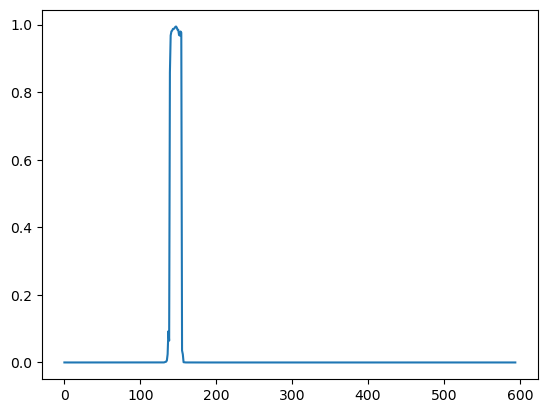

tmd prediction by DeepTMHMM


tmd ['W', 'Y', 'V', 'W', 'L', 'L', 'I', 'C', 'L', 'A', 'G', 'V', 'A', 'M', 'L', 'V', 'L', 'L', 'F', 'F', 'I']
signal []
vfp predicted: 0
score vfp predicted: 1.1920928955078123e-05

 max score predicted

 top scores
     Unnamed: 0   entity     score  index word  start  end  class predicted  \
147         147  LABEL_1  0.994349    148    I    NaN  NaN                1   
146         146  LABEL_1  0.992687    147    A    NaN  NaN                1   
148         148  LABEL_1  0.991335    149    E    NaN  NaN                1   
145         145  LABEL_1  0.989035    146    S    NaN  NaN                1   
143         143  LABEL_1  0.987135    144    S    NaN  NaN                1   

     prob_class_0  prob_class_1  
147      0.005651      0.994349  
146      0.007313      0.992687  
148      0.008665      0.991335  
145      0.010965      0.989035  
143      0.012865      0.987135  
index of true 204
################################
225
Envelope glycoprotein gp160 (Env polyprotein) 
AVG

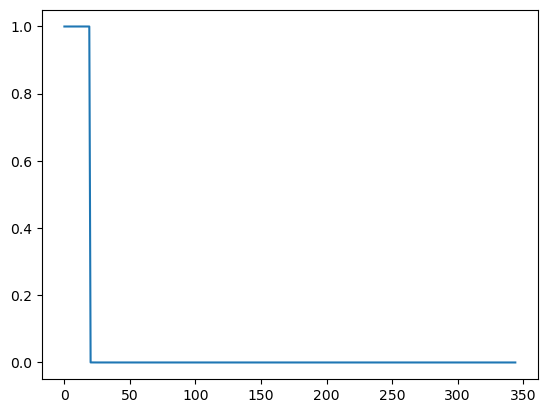

tmd prediction by DeepTMHMM


tmd ['I', 'F', 'I', 'M', 'I', 'V', 'G', 'G', 'L', 'I']
signal ['A', 'V', 'G', 'M', 'G', 'A', 'V', 'L', 'F', 'G']
vfp predicted: 1
score vfp predicted: 0.9998822212219238

 max score predicted

 top scores
    Unnamed: 0   entity     score  index word  start  end  class predicted  \
13          13  LABEL_1  0.999974     14    A    NaN  NaN                1   
14          14  LABEL_1  0.999967     15    A    NaN  NaN                1   
10          10  LABEL_1  0.999965     11    F    NaN  NaN                1   
11          11  LABEL_1  0.999961     12    L    NaN  NaN                1   
18          18  LABEL_1  0.999961     19    M    NaN  NaN                1   

    prob_class_0  prob_class_1  
13      0.000026      0.999974  
14      0.000033      0.999967  
10      0.000035      0.999965  
11      0.000039      0.999961  
18      0.000039      0.999961  
index of true 0
################################
265
Envelope glycoprotein gp160 (Env polyprotein) 
AAGLGALFLGFLGDSREHMGA
vfp mo

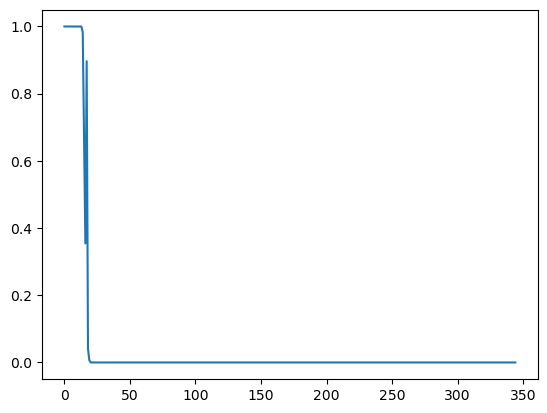

tmd prediction by DeepTMHMM


tmd ['I', 'K', 'I', 'F', 'I', 'M', 'I', 'V', 'G', 'G', 'L', 'I', 'G', 'L', 'R', 'I', 'V', 'F', 'A', 'V', 'L']
signal []
vfp predicted: 1
score vfp predicted: 0.9999490976333618

 max score predicted

 top scores
    Unnamed: 0   entity     score  index word  start  end  class predicted  \
6            6  LABEL_1  0.999958      7    L    NaN  NaN                1   
3            3  LABEL_1  0.999954      4    L    NaN  NaN                1   
10          10  LABEL_1  0.999951     11    F    NaN  NaN                1   
0            0  LABEL_1  0.999949      1    A    NaN  NaN                1   
5            5  LABEL_1  0.999947      6    A    NaN  NaN                1   

    prob_class_0  prob_class_1  
6       0.000042      0.999958  
3       0.000046      0.999954  
10      0.000049      0.999951  
0       0.000051      0.999949  
5       0.000053      0.999947  
index of true 0
################################
574
Pre-glycoprotein polyprotein GP complex
GTFTWTLSDSSGVENPGGYCLTKWMILA

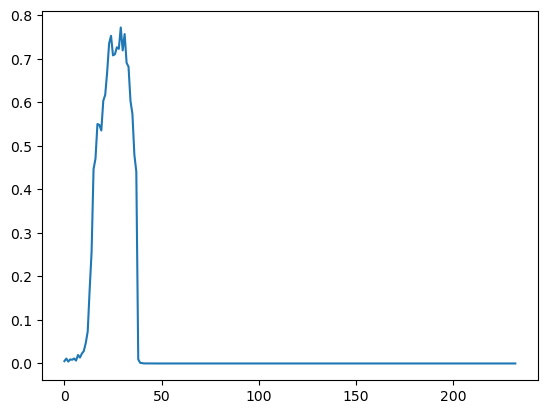

tmd prediction by DeepTMHMM


tmd ['L', 'M', 'D', 'L', 'L', 'M', 'F', 'S', 'T', 'S']
signal []
vfp predicted: 0
score vfp predicted: 0.0054264664649963

 max score predicted

 top scores
    Unnamed: 0   entity     score  index word  start  end  class predicted  \
29          29  LABEL_1  0.771688     30    E    NaN  NaN                1   
31          31  LABEL_1  0.756582     32    K    NaN  NaN                1   
24          24  LABEL_1  0.752612     25    M    NaN  NaN                1   
23          23  LABEL_1  0.734824     24    W    NaN  NaN                1   
27          27  LABEL_1  0.726236     28    A    NaN  NaN                1   

    prob_class_0  prob_class_1  
29      0.228312      0.771688  
31      0.243418      0.756582  
24      0.247388      0.752612  
23      0.265176      0.734824  
27      0.273764      0.726236  
index of true 0
################################
618
fusion glycoprotein F0
FLGLILGLGAAVTAGVALAKT
vfp model prediction


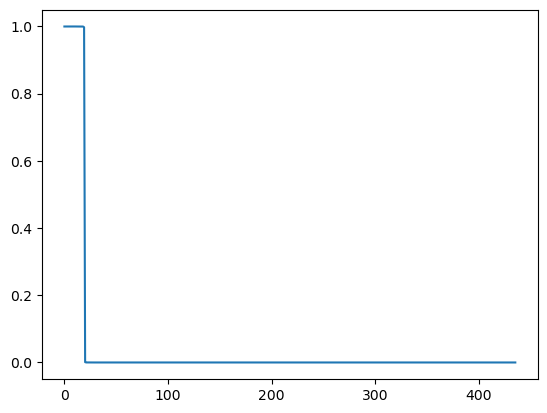

tmd prediction by DeepTMHMM


tmd ['L', 'L', 'F', 'V', 'V', 'M', 'L', 'I', 'I', 'I', 'M', 'A', 'V', 'I', 'G', 'F', 'I', 'L', 'Y']
signal []
vfp predicted: 1
score vfp predicted: 0.9999030828475952

 max score predicted

 top scores
    Unnamed: 0   entity     score  index word  start  end  class predicted  \
3            3  LABEL_1  0.999971      4    L    NaN  NaN                1   
16          16  LABEL_1  0.999961     17    A    NaN  NaN                1   
9            9  LABEL_1  0.999958     10    A    NaN  NaN                1   
10          10  LABEL_1  0.999956     11    A    NaN  NaN                1   
12          12  LABEL_1  0.999955     13    T    NaN  NaN                1   

    prob_class_0  prob_class_1  
3       0.000029      0.999971  
16      0.000039      0.999961  
9       0.000042      0.999958  
10      0.000044      0.999956  
12      0.000045      0.999955  
index of true 0
################################
779
G glycoprotein
[FRWYGPKY CGYATVT]
vfp model prediction


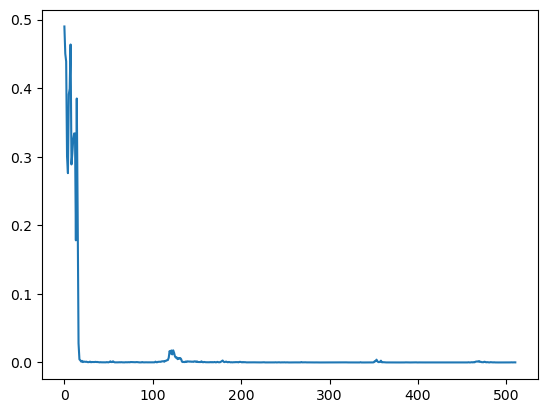

tmd prediction by DeepTMHMM


tmd ['F', 'F', 'F', 'I', 'I', 'G', 'L', 'I', 'I', 'G', 'L', 'F', 'L', 'V', 'L', 'R', 'V', 'G', 'I', 'Y', 'L']
signal ['M', 'K', 'C', 'L', 'L', 'Y', 'L', 'A', 'F', 'L', 'S', 'I', 'G', 'V', 'N', 'C']
vfp predicted: 0
score vfp predicted: 0.4900495409965515

 max score predicted

 top scores
   Unnamed: 0   entity     score  index word  start  end  class predicted  \
0           0  LABEL_0  0.509950      1    M    NaN  NaN                0   
7           7  LABEL_0  0.536221      8    A    NaN  NaN                0   
1           1  LABEL_0  0.549599      2    K    NaN  NaN                0   
2           2  LABEL_0  0.561032      3    C    NaN  NaN                0   
6           6  LABEL_0  0.600738      7    L    NaN  NaN                0   

   prob_class_0  prob_class_1  
0      0.509950      0.490050  
7      0.536221      0.463779  
1      0.549599      0.450401  
2      0.561032      0.438968  
6      0.600738      0.399262  
index of true 0
################################
804
Sp

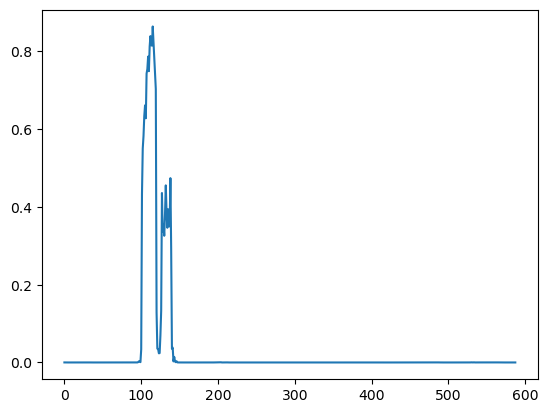

tmd prediction by DeepTMHMM


tmd ['W', 'Y', 'I', 'W', 'L', 'G', 'F', 'I', 'A', 'G', 'L', 'I', 'A', 'I', 'V', 'M', 'V', 'T', 'I', 'M', 'L']
signal []
vfp predicted: 0
score vfp predicted: 0.0001386404037475

 max score predicted

 top scores
     Unnamed: 0   entity     score  index word  start  end  class predicted  \
115         115  LABEL_1  0.864168    116    N    NaN  NaN                1   
112         112  LABEL_1  0.839373    113    G    NaN  NaN                1   
116         116  LABEL_1  0.822589    117    F    NaN  NaN                1   
113         113  LABEL_1  0.815952    114    G    NaN  NaN                1   
114         114  LABEL_1  0.814880    115    F    NaN  NaN                1   

     prob_class_0  prob_class_1  
115      0.135832      0.864168  
112      0.160627      0.839373  
116      0.177411      0.822589  
113      0.184048      0.815952  
114      0.185120      0.814880  
index of true 0


In [54]:
# T12  batch1
model_name_specific = '/seq_transformers_token_10KFOLD_cluster80_epoch20_T12'  # nao me parece melhor 
output(model_name_specific)

In [6]:
# T6 ESM2b
# model_name_specific = '/seq_transformers_token_10KFOLD_cluster80_bilstm'    # mt bom epochs 3 model small 1500 seqs inicio
# model_name_specific = '/seq_transformers_token_10KFOLD_cluster80_epoch5'   # epochs 5 em vez de 3 mt mt bom 
# model_name_specific = '/seq_transformers_token_10KFOLD_cluster80_epoch10'   # epochs 10 em vez de 3  mt mt bom 
# model_name_specific = '/seq_transformers_token_10KFOLD_cluster80_epoch15'   # epochs 15 em vez de 3  
# model_name_specific = '/seq_transformers_token_10KFOLD_cluster80_epoch20_T6'  # n faz diferença 
# model_name_specific = '/seq_transformers_token_10KFOLD_cluster80_epoch30_T6'  # n faz diferença 

# # T12  batch1
# model_name_specific = '/seq_transformers_token_10KFOLD_cluster80_epoch15_T12'  # parecido c os de cima 
# model_name_specific = '/seq_transformers_token_10KFOLD_cluster80_epoch10_T12'  # mt bom nem sei s é melhor 
# model_name_specific = '/seq_transformers_token_10KFOLD_cluster80_epoch5_T12'  # ficam mais fracos os scores
# model_name_specific = '/seq_transformers_token_10KFOLD_cluster80_epoch20_T12'  # nao me parece melhor 



# T36 n tenho memoria  nem com batch 1. posso diinuir a seq. mas tenho q enconrar o viral fp para isso pq so estou a cortr ate aos 1500 pq n aparece nenhum vfp depois disso



# output(model_name_specific)

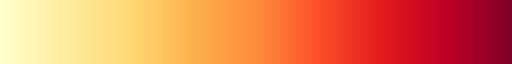

In [11]:
plt.get_cmap('YlOrRd')  

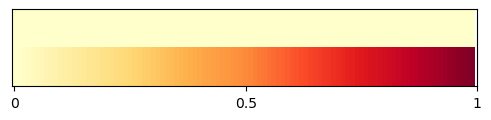

In [28]:

# Create a range of values from 0 to 1
x = np.linspace(0, 1, 100)
y = np.zeros_like(x)

# Plot the color map
fig, ax = plt.subplots(figsize=(6, 1))
im = ax.imshow([y, x], cmap='YlOrRd', aspect='auto')

# Set the axis ticks and labels
tick_positions = [0, 50, 100]
tick_labels = ['0', '0.5', '1']
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels)

# Remove the y-axis ticks and labels
ax.set_yticks([])
ax.yaxis.set_ticks_position('none')

# # Create a color bar
# cbar = fig.colorbar(im, ax=ax, orientation='horizontal', pad=0.05, aspect=30)
# cbar.set_ticks(tick_positions)
# cbar.set_ticklabels(tick_labels)

# Show the plot
plt.show()